# ---------------------------ARRAYS TOPIC--------------------------------
**==============================================================================**
# Assembled By - Praveen Kumar Sharma
# Source - GeeksForGeeks
**==============================================================================**

In [1]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **1. K-Concatenation**
https://www.codechef.com/JAN18/problems/KCON/

In [2]:
/*
You are given an array A with size N (indexed from 0) and an integer K. 
Let's define another array B with size N · K as the array that's formed by concatenating K copies of array A.

For example, 
if A = {1, 2} and K = 3, 
then B = {1, 2, 1, 2, 1, 2}.

You have to find the maximum subarray sum of the array B. 
Fomally, you should compute the maximum value of Bi + Bi+1 + Bi+2 + ... + Bj, where 0 ≤ i ≤ j < N · K.
*/

In [3]:
/*
The problem is to find the maximum sub array of concatenatedarr.
Maximum SubArray of an array A is a continuous SubArray within the array A that has the largest Sum.
The best method for finding Maximum SubArray is Kadanae's algorithm.

Here you have to find the Maximum SubArray for an array concatenated_arr which is a k-times repetitive array of A. 
For e.g.. if A is {3, 2, -1} and K is 3 then B will be {3, 2, -1, 3, 2, -1, 3, 2, -1}. 

Method:
The maximum SubArray of concatenated_arr can be the sum of all its elements.
For e.g.. if A is {3, 2, -1} and K is 3, then B will be {3, 2, -1, 3, 2, -1, 3, 2, -1}.
The sum of all the elements in concatenated_arr will give us 12. To find this one we don't need to create the array concatenated_arr.
We can simply find the sum of all the elements in array A and we can mutilply it with K.
But wait, we can omit the last term in it so that the sum will become 13.
For this one we can use prefix and suffix calculations.
Eg:
A is repeated k times in concatenatedarr.
Consider the first repetition of A is A1, second is A2 and so on. 
So now our B array(if K=8) will be {A1, A2, A3, A4, A5, A6, A7, A8}. 
If you omit the first two elements in A1 and the last two elements in A8, you might also get the maxsub array.
So here we can check whether it is possible to omit some initial elements in A1 and some Final elements in A8. 
We use prefix and suffix variables for that to calculate the sum of A1 and A10 specifically and he adds the remaining elements 
i.e answer = {prefix + sum_of_elements(A2) + sum_of_elements(A3) + sum_of_elements(A4) + sum_of_elements(A5) + sum_of_elements(A6) + sum_of_elements(A7) + suffix} , 
which in simplified form becomes {prefix + sum_of_elements(A)*(k-2) + suffix}.
*/

In [4]:
int mod  = (int) Math.pow(10,9)+7;
public int kConcatenationMaxSum(int[] ar, int k) {
    long kadanes= kadanesAlgo(ar);
    if(k==1){
        return (int)kadanes;
    }
    long prefixSum= prefixSum(ar);
    long suffixSum=suffixSum(ar);
    long sum=0;
    for (int i1 : ar) {
        sum += i1;
    }
    if(sum>0){
        return (int)(Math.max(((sum*(k-2))%mod+suffixSum%mod+prefixSum%mod)%mod,kadanes%mod));
    }
    else{
        return (int)(Math.max((prefixSum%mod+suffixSum%mod)%mod,kadanes%mod));
    }

}
public  long kadanesAlgo(int[] ar){

    long currentSum=0;
    long maxSum=Integer.MIN_VALUE;
    for(int i=0;i<ar.length;i++){
        currentSum=currentSum>0?(currentSum+ar[i])%mod:ar[i];
        maxSum=Math.max(currentSum,maxSum);
    }
    return maxSum<0?0:maxSum%mod;

}


public  long prefixSum(int[] ar){

    long currentSum=0;
    long maxSum=Integer.MIN_VALUE;
    for(int i=0;i<ar.length;i++){
        currentSum= (currentSum+ar[i])%mod;
        maxSum=Math.max(maxSum,currentSum);
    }
    return maxSum;


}

public  long suffixSum(int[] ar){


    long currentSum=0;
    long maxSum=Integer.MIN_VALUE;
    for(int i=ar.length-1;i>=0;i--){
        currentSum=(currentSum+ar[i])%mod;
        maxSum=Math.max(currentSum,maxSum);
    }
    return maxSum;

}

In [5]:
int[] arr = {3,2,-1};
System.out.println(kConcatenationMaxSum(arr,3))

13


In [6]:
class Solution {
    static final long M=(long)Math.pow(10,9)+7;
    public static int kConcatenationMaxSum(int[] arr, int k) {
        int n=arr.length;
        long res=0;
        long last=0;
        long sum=0;
        long sumMax=0;
    
        // ordinary maximum subarray sum problem to find maximum
        for(int j=0;j<n;++j){
            long r = Math.max((long)arr[j],arr[j]+last);
            res=Math.max(res,r);
            last=r;
            sum+=arr[j];
            if(sumMax<sum){
                sumMax=sum;
            }
        }
        
        // if there were more repeatations, we recaucluate the res
        if(k>1 && sumMax>0){
            if(sum>0){
                res = Math.max(res, last+(k-2)*sum+sumMax);
            }else{
                res =Math.max(res,last+sumMax);
            }
        }
        return (int)(res%M);
    }
}
int[] arr = {3,2,-1};
System.out.println(Solution.kConcatenationMaxSum(arr,3))

13


## **2. Find subarray with given sum | Set 1 (Nonnegative Numbers)**
https://www.geeksforgeeks.org/find-subarray-with-given-sum/

In [7]:
/*
Given an unsorted array of nonnegative integers, find a continuous subarray which adds to a given number.
Examples :

Input: arr[] = {1, 4, 20, 3, 10, 5}, sum = 33
Ouptut: Sum found between indexes 2 and 4



Input: arr[] = {1, 4, 0, 0, 3, 10, 5}, sum = 7
Ouptut: Sum found between indexes 1 and 4

Input: arr[] = {1, 4}, sum = 0
Output: No subarray found

There may be more than one subarrays with sum as the given sum. The following solutions print first such subarray.
*/

In [8]:
/*
Initialize a variable curr_sum as the first element. 
curr_sum indicates the sum of the current subarray. 
Start from the second element and add all elements one by one to the curr_sum. 
If curr_sum becomes equal to the sum, then print the solution. 
If curr_sum exceeds the sum, then remove trailing elements while curr_sum is greater than the sum.

Following is the implementation of the above approach.
*/

In [9]:
int subArraySum(int arr[], int n, int sum)  
    { 
        int curr_sum = arr[0], start = 0, i; 
  
        // Pick a starting point 
        for (i = 1; i <= n; i++)  
        { 
            // If curr_sum exceeds the sum, then remove the starting elements 
            while (curr_sum > sum && start < i-1) 
            { 
                curr_sum = curr_sum - arr[start]; 
                start++; 
            } 
              
            // If curr_sum becomes equal to sum, then return true 
            if (curr_sum == sum)  
            { 
                int p = i-1; 
                System.out.println("Sum found between indexes " + start 
                        + " and " + p); 
                return 1; 
            } 
              
            // Add this element to curr_sum 
            if (i < n) 
            curr_sum = curr_sum + arr[i]; 
              
        } 
  
        System.out.println("No subarray found"); 
        return 0; 
    }

In [10]:
int arr[] = {15, 2, 4, 8, 9, 5, 10, 23}; 
int n = arr.length; 
int sum = 23; 
subArraySum(arr, n, sum); 

Sum found between indexes 1 and 4


1

## **3. Equilibrium index of an array**
https://www.geeksforgeeks.org/equilibrium-index-of-an-array/

In [11]:
/*
Equilibrium index of an array is an index such that the sum of elements at lower indexes is equal to the sum of elements at higher indexes. For example, in an array A:

Example :

Input: A[] = {-7, 1, 5, 2, -4, 3, 0}
Output: 3
3 is an equilibrium index, because:
A[0] + A[1] + A[2] = A[4] + A[5] + A[6]



Input: A[] = {1, 2, 3}
Output: -1

Write a function int equilibrium(int[] arr, int n); that given a sequence arr[] of size n, returns an equilibrium index (if any) or -1 if no equilibrium indexes exist.
*/

In [12]:
/*
The idea is to get the total sum of the array first. 
Then Iterate through the array and keep updating the left sum which is initialized as zero. 
In the loop, we can get the right sum by subtracting the elements one by one. 

1) Initialize leftsum  as 0
2) Get the total sum of the array as sum
3) Iterate through the array and for each index i, do following.
    a)  Update sum to get the right sum.  
           sum = sum - arr[i] 
       // sum is now right sum
    b) If leftsum is equal to sum, then return current index. 
       // update leftsum for next iteration.
    c) leftsum = leftsum + arr[i]
4) return -1 
// If we come out of loop without returning then
// there is no equilibrium index
The image below shows the dry run of the above approach:
*/

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190620123235/Equilibrium-index-of-an-array1.png" alt="IMG 3 Preview" title="IMG 3" style="width:500px;height:600px"/>

In [13]:
int equilibrium(int arr[], int n) 
    { 
        int sum = 0; // initialize sum of whole array 
        int leftsum = 0; // initialize leftsum 
  
        /* Find sum of the whole array */
        for (int i = 0; i < n; ++i) 
            sum += arr[i]; 
  
        for (int i = 0; i < n; ++i) { 
            sum -= arr[i]; // sum is now right sum for index i 
  
            if (leftsum == sum) 
                return i; 
  
            leftsum += arr[i]; 
        } 
  
        /* If no equilibrium index found, then return 0 */
        return -1; 
    } 

In [14]:
int arr[] = { -7, 1, 5, 2, -4, 3, 0 }; 
        int arr_size = arr.length; 
        System.out.println("First equilibrium index is " +  
                          equilibrium(arr, arr_size));

First equilibrium index is 3


## **4. Maximum Sum Increasing Subsequence | DP-14**
https://www.geeksforgeeks.org/maximum-sum-increasing-subsequence-dp-14/

In [15]:
/*
Given an array of n positive integers. Write a program to find the sum of maximum sum subsequence of the given array such that the integers in the subsequence are sorted in increasing order. 
For example, 
if input is {1, 101, 2, 3, 100, 4, 5}, 
then output should be 106 (1 + 2 + 3 + 100), 
if the input array is {3, 4, 5, 10}, 
then output should be 22 (3 + 4 + 5 + 10) 
and if the input array is {10, 5, 4, 3}, 
then output should be 10
*/

In [16]:
/*
This problem is a variation of standard Longest Increasing Subsequence (LIS) problem. 
We need a slight change in the Dynamic Programming solution of LIS problem. 
All we need to change is to use sum as a criteria instead of length of increasing subsequence.

Following are the Dynamic Programming solution to the problem :
*/

In [17]:
static int maxSumIS(int arr[], int n) 
    { 
        int i, j, max = 0; 
        int msis[] = new int[n]; 
  
        /* Initialize msis values  
           for all indexes */
        for (i = 0; i < n; i++) 
            msis[i] = arr[i]; 
  
        /* Compute maximum sum values 
           in bottom up manner */
        for (i = 1; i < n; i++) 
            for (j = 0; j < i; j++) 
                if (arr[i] > arr[j] && 
                    msis[i] < msis[j] + arr[i]) 
                    msis[i] = msis[j] + arr[i]; 
  
        /* Pick maximum of all 
           msis values */
        for (i = 0; i < n; i++) 
            if (max < msis[i]) 
                max = msis[i]; 
  
        return max; 
    } 

In [18]:
int arr[] = new int[]{1, 101, 2, 3, 100, 4, 5}; 
int n = arr.length; 
System.out.println("Sum of maximum sum "+ 
                            "increasing subsequence is "+ 
                              maxSumIS(arr, n)); 

Sum of maximum sum increasing subsequence is 106


## **5. Convert array into Zig-Zag fashion**
https://www.geeksforgeeks.org/convert-array-into-zig-zag-fashion/

In [19]:
/*
Given an array of DISTINCT elements, rearrange the elements of array in zig-zag fashion in O(n) time. 
The converted array should be in form a < b > c < d > e < f.
Example:

Input: arr[] = {4, 3, 7, 8, 6, 2, 1}
Output: arr[] = {3, 7, 4, 8, 2, 6, 1}



Input: arr[] = {1, 4, 3, 2}
Output: arr[] = {1, 4, 2, 3}
*/

In [20]:
/*
A Simple Solution is to first sort the array. 
After sorting, exclude the first element, swap the remaining elements in pairs. 
(i.e. keep arr[0] as it is, swap arr[1] and arr[2], swap arr[3] and arr[4], and so on).

Time complexity: O(N log N) since we need to sort the array first.

We can convert in O(n) time using an efficient approach. The idea is to use a modified one pass of bubble sort.

Maintain a flag for representing which order(i.e. < or >) currently we need.
If the current two elements are not in that order then swap those elements otherwise not.
Let us see the main logic using three consecutive elements A, B, C.

Suppose we are processing B and C currently and the current relation is ‘<', but we have B > C. 
Since current relation is ‘<' previous relation must be '>‘ i.e., A must be greater than B. 
So, the relation is A > B and B > C. We can deduce A > C. 
So if we swap B and C then the relation is A > C and C < B. 
Finally we get the desired order A C B

Refer this for more explanation.

Below image is a dry run of the above approach:
*/

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190620131651/Convert-array-into-Zig-Zag-fashion.png" alt="IMG 4 Preview" title="IMG 4" style="width:700px;height:900px"/>

In [21]:
// Java program to sort an array in Zig-Zag form 
import java.util.Arrays; 

class Test 
{ 
	static int arr[] = new int[]{4, 3, 7, 8, 6, 2, 1}; 
	
	// Method for zig-zag conversion of array 
	static void zigZag() 
	{ 
		// Flag true indicates relation "<" is expected, 
		// else ">" is expected. The first expected relation 
		// is "<" 
		boolean flag = true; 
		
		int temp =0; 
	
		for (int i=0; i<=arr.length-2; i++) 
		{ 
			if (flag) /* "<" relation expected */
			{ 
				/* If we have a situation like A > B > C, 
				we get A > B < C by swapping B and C */
				if (arr[i] > arr[i+1]) 
				{ 
					// swap 
					temp = arr[i]; 
					arr[i] = arr[i+1]; 
					arr[i+1] = temp; 
				} 
				
			} 
			else /* ">" relation expected */
			{ 
				/* If we have a situation like A < B < C, 
				we get A < C > B by swapping B and C */
				if (arr[i] < arr[i+1]) 
				{ 
					// swap 
					temp = arr[i]; 
					arr[i] = arr[i+1]; 
					arr[i+1] = temp; 
				} 
			} 
			flag = !flag; /* flip flag */
		} 
	} 
	
	// Driver method to test the above function 
	public static void main() 
	{ 
		zigZag(); 
		System.out.println(Arrays.toString(arr)); 
	} 
} 


In [22]:
Test.main()

[3, 7, 4, 8, 2, 6, 1]


In [23]:
static int arr[] = new int[]{4, 3, 7, 8, 6, 2, 1}; 

In [24]:
// Method for zig-zag conversion of array 
static void zigZag() 
{ 
	// Flag true indicates relation "<" is expected, 
	// else ">" is expected. The first expected relation 
	// is "<" 
	boolean flag = true; 
	
	int temp =0; 

	for (int i=0; i<=arr.length-2; i++) 
	{ 
		if (flag) /* "<" relation expected */
		{ 
			/* If we have a situation like A > B > C, 
			we get A > B < C by swapping B and C */
			if (arr[i] > arr[i+1]) 
			{ 
                // swap 
				temp = arr[i]; 
				arr[i] = arr[i+1]; 
				arr[i+1] = temp; 
			} 
			
		} 
		else /* ">" relation expected */
		{ 
			/* If we have a situation like A < B < C, 
			we get A < C > B by swapping B and C */
			if (arr[i] < arr[i+1]) 
			{ 
				// swap 
				temp = arr[i]; 
				arr[i] = arr[i+1]; 
				arr[i+1] = temp; 
			} 
		} 
		flag = !flag; /* flip flag */
	} 
} 

In [25]:
zigZag(); 
System.out.println(Arrays.toString(arr)); 

[3, 7, 4, 8, 2, 6, 1]


## **6. Find a pair with the given difference**
https://www.geeksforgeeks.org/find-a-pair-with-the-given-difference/

In [26]:
/*
Given an unsorted array and a number n, find if there exists a pair of elements in the array whose difference is n.
Examples:

Input: arr[] = {5, 20, 3, 2, 50, 80}, n = 78
Output: Pair Found: (2, 80)

Input: arr[] = {90, 70, 20, 80, 50}, n = 45
Output: No Such Pair
*/

In [27]:
/*The simplest method is to run two loops, 
the outer loop picks the first element (smaller element) and the inner loop looks for the element picked by outer loop plus n. 
Time complexity of this method is O(n^2).

We can use sorting and Binary Search to improve time complexity to O(nLogn). 
The first step is to sort the array in ascending order. 
Once the array is sorted, traverse the array from left to right, and for each element arr[i], binary search for arr[i] + n in arr[i+1..n-1]. 
If the element is found, return the pair.
Both first and second steps take O(nLogn). So overall complexity is O(nLogn).

The second step of the above algorithm can be improved to O(n). 
The first step remain same. The idea for second step is take two index variables i and j, initialize them as 0 and 1 respectively. 
Now run a linear loop. If arr[j] – arr[i] is smaller than n, we need to look for greater arr[j], so increment j. 
If arr[j] – arr[i] is greater than n, we need to look for greater arr[i], so increment i.
The following code is only for the second step of the algorithm, it assumes that the array is already sorted.
*/

In [28]:
static boolean findPair(int arr[],int n) 
    { 
        int size = arr.length; 
  
        // Initialize positions of two elements 
        int i = 0, j = 1; 
  
        // Search for a pair 
        while (i < size && j < size) 
        { 
            if (i != j && arr[j]-arr[i] == n) 
            { 
                System.out.print("Pair Found: "+ 
                                 "( "+arr[i]+", "+ arr[j]+" )"); 
                return true; 
            } 
            else if (arr[j] - arr[i] < n) 
                j++; 
            else
                i++; 
        } 
  
        System.out.print("No such pair"); 
        return false; 
    } 

In [29]:
int arr[] = {1, 8, 30, 40, 100}; 
int n = 60; 
findPair(arr,n);

Pair Found: ( 40, 100 )

true

## **7. Chocolate Distribution Problem**
https://www.geeksforgeeks.org/chocolate-distribution-problem/

In [30]:
/*
Given an array of n integers where each value represents number of chocolates in a packet. 
Each packet can have variable number of chocolates. 
There are m students, the task is to distribute chocolate packets such that:

Each student gets one packet.
The difference between the number of chocolates in packet with maximum chocolates and packet with minimum chocolates given to the students is minimum.
Examples:

Input : arr[] = {7, 3, 2, 4, 9, 12, 56}
m = 3
Output: Minimum Difference is 2
We have seven packets of chocolates and
we need to pick three packets for 3 students
If we pick 2, 3 and 4, we get the minimum
difference between maximum and minimum packet
sizes.



Input : arr[] = {3, 4, 1, 9, 56, 7, 9, 12}
m = 5
Output: Minimum Difference is 6
The set goes like 3,4,7,9,9 and the output
is 9-3 = 6

Input : arr[] = {12, 4, 7, 9, 2, 23, 25, 41,
30, 40, 28, 42, 30, 44, 48,
43, 50}
m = 7
Output: Minimum Difference is 10
We need to pick 7 packets. We pick 40, 41,
42, 44, 48, 43 and 50 to minimize difference
between maximum and minimum.
*/

In [31]:
/*
A simple solution is to generate all subsets of size m of arr[0..n-1]. 
For every subset, find the difference between the maximum and minimum elements in it. Finally, return the minimum difference.

An efficient solution is based on the observation that to minimize the difference, we must choose consecutive elements from a sorted packet. 
We first sort the array arr[0..n-1], then find the subarray of size m with the minimum difference between last and first elements.

Below image is a dry run of the above approach:
*/

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190620132657/Chocolate-Distribution-Problem.png" alt="IMG 7 Preview" title="IMG 7" style="width:750px;height:900px"/>

In [32]:
// arr[0..n-1] represents sizes of packets. m is number of students. 
// Returns minimum difference between maximum and minimum values of distribution. 
    static int findMinDiff(int arr[], int n, int m) 
    { 
        // if there are no chocolates or number of students is 0 
        if (m == 0 || n == 0) 
            return 0; 
       
        // Sort the given packets 
        Arrays.sort(arr); 
       
        // Number of students cannot be more than number of packets 
        if (n < m) 
           return -1; 
       
        // Largest number of chocolates 
        int min_diff = Integer.MAX_VALUE; 
       
        // Find the subarray of size m such that difference between last 
        // (maximum in case of sorted) and first (minimum in case of sorted) 
        // elements of subarray is minimum. 
        int first = 0, last = 0; 
        for (int i = 0; i + m - 1 < n; i++) 
        { 
            int diff = arr[i+m-1] - arr[i]; 
            if (diff < min_diff) 
            { 
                min_diff = diff; 
                first = i; 
                last = i + m - 1; 
            } 
        } 
        return (arr[last] - arr[first]); 
    } 

In [33]:
int arr[] = {12, 4, 7, 9, 2, 23, 
            25, 41, 30, 40, 28, 
            42, 30, 44, 48, 43, 50}; 
                     
int m = 7;  // Number of students 
          
int n = arr.length; 
System.out.println("Minimum difference is "
                + findMinDiff(arr, n, m));

Minimum difference is 10


## **8. Minimum Number of Platforms Required for a Railway/Bus Station**
https://www.geeksforgeeks.org/minimum-number-platforms-required-railwaybus-station/

In [34]:
/*
Given arrival and departure times of all trains that reach a railway station, the task is to find the minimum number of platforms required for the railway station so that no train waits.
We are given two arrays which represent arrival and departure times of trains that stop

Examples:

Input: arr[] = {9:00, 9:40, 9:50, 11:00, 15:00, 18:00}
dep[] = {9:10, 12:00, 11:20, 11:30, 19:00, 20:00}
Output: 3
There are at-most three trains at a time (time between 11:00 to 11:20)
*/

In [35]:
/*
We need to find the maximum number of trains that are there on the given railway station at a time. 
A Simple Solution is to take every interval one by one and find the number of intervals that overlap with it. 
Keep track of maximum number of intervals that overlap with an interval. Finally return the maximum value. 
Time Complexity of this solution is O(n2).

We can solve the above problem in O(N Log N) time. The idea is to consider all events in sorted order. 
Once we have all events in sorted order, we can trace the number of trains at any time keeping track of trains that have arrived, but not departed.

For example consider the above example.

    arr[]  = {9:00,  9:40, 9:50,  11:00, 15:00, 18:00}
    dep[]  = {9:10, 12:00, 11:20, 11:30, 19:00, 20:00}

All events sorted by time.
Total platforms at any time can be obtained by subtracting total 
departures from total arrivals by that time.
 Time     Event Type     Total Platforms Needed at this Time                               
 9:00       Arrival                  1
 9:10       Departure                0
 9:40       Arrival                  1
 9:50       Arrival                  2
 11:00      Arrival                  3 
 11:20      Departure                2
 11:30      Departure                1
 12:00      Departure                0
 15:00      Arrival                  1
 18:00      Arrival                  2 
 19:00      Departure                1
 20:00      Departure                0

Minimum Platforms needed on railway station = Maximum platforms needed at any time 
                                           = 3  
Below is the implementation of the above approach. 
Note that the implementation doesn’t create a single sorted list of all events, 
rather it individually sorts arr[] and dep[] arrays, and then uses merge process of merge sort to process them together as a single sorted array.

Note : This approach assumes that trains are arriving and departing on same date.
*/

In [36]:
// Returns minimum number of platforms reqquired 
static int findPlatform(int arr[], int dep[], int n) 
{ 
   // Sort arrival and departure arrays 
   Arrays.sort(arr); 
   Arrays.sort(dep); 
   
   // plat_needed indicates number of platforms 
   // needed at a time 
   int plat_needed = 1, result = 1; 
   int i = 1, j = 0; 
   
   // Similar to merge in merge sort to process  
   // all events in sorted order 
   while (i < n && j < n) 
   { 
      // If next event in sorted order is arrival,  
      // increment count of platforms needed 
      if (arr[i] <= dep[j]) 
      { 
          plat_needed++; 
          i++; 
   
          // Update result if needed  
          if (plat_needed > result)  
              result = plat_needed; 
      } 
   
      // Else decrement count of platforms needed 
      else
      { 
          plat_needed--; 
          j++; 
      } 
   } 
   
   return result; 
} 

In [37]:
public static void main() 
{ 
    int arr[] = {900, 940, 950, 1100, 1500, 1800}; 
    int dep[] = {910, 1200, 1120, 1130, 1900, 2000}; 
    int n = arr.length; 
    System.out.println("Minimum Number of Platforms Required = "
                        + findPlatform(arr, dep, n)); 
} 
main();

Minimum Number of Platforms Required = 3


## **9. Trapping Rain Water**
https://www.geeksforgeeks.org/trapping-rain-water/

In [38]:
/*
Given n non-negative integers representing an elevation map where the width of each bar is 1, 
compute how much water it is able to trap after raining.
Examples:

Input: arr[]   = {2, 0, 2}
Output: 2
Structure is like below
| |
|_|
We can trap 2 units of water in the middle gap.

Input: arr[]   = {3, 0, 0, 2, 0, 4}
Output: 10
Structure is like below
     |
|    |
|  | |
|__|_| 
We can trap "3*2 units" of water between 3 an 2,
"1 unit" on top of bar 2 and "3 units" between 2 
and 4.  See below diagram also.

Input: arr[] = [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
Output: 6
       | 
   |   || |
_|_||_||||||
Trap "1 unit" between first 1 and 2, "4 units" between
first 2 and 3 and "1 unit" between second last 1 and last 2 
*/


<img src="https://www.geeksforgeeks.org/wp-content/uploads/watertrap.png"/>


In [39]:
/*
An element of the array can store water if there are higher bars on left and right. 
We can find the amount of water to be stored in every element by finding the heights of bars on left and right sides. 
The idea is to compute the amount of water that can be stored in every element of array. 
For example, consider the array {3, 0, 0, 2, 0, 4}, 
we can store three units of water at indexes 1 and 2, 
and one unit of water at index 3, 
and three units of water at index 4.

An Efficient Solution is to pre-compute highest bar on left and right of every bar in O(n) time. 
Then use these pre-computed values to find the amount of water in every array element.

Below is the implementation of this solution.
*/

In [40]:
static int arr[] = new int[] { 0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1 }; 

// Method for maximum amount of water 
static int findWater(int n) 
{ 
    // left[i] contains height of tallest bar to the 
    // left of i'th bar including itself 
    int left[] = new int[n]; 

    // Right [i] contains height of tallest bar to 
    // the right of ith bar including itself 
    int right[] = new int[n]; 

    // Initialize result 
    int water = 0; 

    // Fill left array 
    left[0] = arr[0]; 
    for (int i = 1; i < n; i++) 
        left[i] = Math.max(left[i - 1], arr[i]); 

    // Fill right array 
    right[n - 1] = arr[n - 1]; 
    for (int i = n - 2; i >= 0; i--) 
        right[i] = Math.max(right[i + 1], arr[i]); 

    // Calculate the accumulated water element by element 
    // consider the amount of water on i'th bar, the 
    // amount of water accumulated on this particular 
    // bar will be equal to min(left[i], right[i]) - arr[i] . 
    for (int i = 0; i < n; i++) 
        water += Math.min(left[i], right[i]) - arr[i]; 

    return water; 
} 

In [41]:
System.out.println("Maximum water that can be accumulated is " + findWater(arr.length)); 

Maximum water that can be accumulated is 6


## **10. Stock Buy Sell to Maximize Profit**
https://www.geeksforgeeks.org/stock-buy-sell/

In [42]:
/*
The cost of a stock on each day is given in an array, 
find the max profit that you can make by buying and selling in those days. 
For example, if the given array is {100, 180, 260, 310, 40, 535, 695}, 
the maximum profit can earned by buying on day 0, selling on day 3. Again buy on day 4 and sell on day 6. 
If the given array of prices is sorted in decreasing order, then profit cannot be earned at all.
*/

In [43]:
/*
Naive approach: 
A simple approach is to try buying the stocks and selling them on every single day 
when profitable and keep updating the maximum profit so far.
*/

In [44]:
static int maxProfit(int price[], int start, int end) 
{ 
  
    // If the stocks can't be bought 
    if (end <= start) 
        return 0; 
  
    // Initialise the profit 
    int profit = 0; 
  
    // The day at which the stock 
    // must be bought 
    for (int i = start; i < end; i++)  
    { 
  
        // The day at which the 
        // stock must be sold 
        for (int j = i + 1; j <= end; j++) 
        { 
  
            // If byuing the stock at ith day and 
            // selling it at jth day is profitable 
            if (price[j] > price[i])  
            { 
  
                // Update the current profit 
                int curr_profit = price[j] - price[i] 
                                + maxProfit(price, start, i - 1) 
                                + maxProfit(price, j + 1, end); 
  
                // Update the maximum profit so far 
                profit = Math.max(profit, curr_profit); 
            } 
        } 
    } 
    return profit; 
} 

In [45]:
int price[] = { 100, 180, 260, 310, 
                40, 535, 695 }; 
int n = price.length; 

System.out.print(maxProfit(price, 0, n - 1)); 

865

In [46]:
/*
Efficient approach: If we are allowed to buy and sell only once, then we can use following algorithm. 
Maximum difference between two elements. Here we are allowed to buy and sell multiple times.
Following is algorithm for this problem.

Find the local minima and store it as starting index. If not exists, return.
Find the local maxima. and store it as ending index. If we reach the end, set the end as ending index.
Update the solution (Increment count of buy sell pairs)
Repeat the above steps if end is not reached.
*/

In [47]:
class Interval { 
    int buy, sell; 
} 
  
class StockBuySell { 
    // This function finds the buy sell schedule for maximum profit 
    void stockBuySell(int price[], int n) 
    { 
        // Prices must be given for at least two days 
        if (n == 1) 
            return; 
  
        int count = 0; 
  
        // solution array 
        ArrayList<Interval> sol = new ArrayList<Interval>(); 
  
        // Traverse through given price array 
        int i = 0; 
        while (i < n - 1) { 
            // Find Local Minima. Note that the limit is (n-2) as we are 
            // comparing present element to the next element. 
            while ((i < n - 1) && (price[i + 1] <= price[i])) 
                i++; 
  
            // If we reached the end, break as no further solution possible 
            if (i == n - 1) 
                break; 
  
            Interval e = new Interval(); 
            e.buy = i++; 
            // Store the index of minima 
  
            // Find Local Maxima.  Note that the limit is (n-1) as we are 
            // comparing to previous element 
            while ((i < n) && (price[i] >= price[i - 1])) 
                i++; 
  
            // Store the index of maxima 
            e.sell = i - 1; 
            sol.add(e); 
  
            // Increment number of buy/sell 
            count++; 
        } 
  
        // print solution 
        if (count == 0) 
            System.out.println("There is no day when buying the stock "
                               + "will make profit"); 
        else
            for (int j = 0; j < count; j++) 
                System.out.println("Buy on day: " + sol.get(j).buy 
                                   + "        "
                                   + "Sell on day : " + sol.get(j).sell); 
  
        return; 
    } 
}

In [48]:
StockBuySell stock = new StockBuySell(); 
  
// stock prices on consecutive days 
int price[] = { 100, 180, 260, 310, 40, 535, 695 }; 
int n = price.length; 

// fucntion call 
stock.stockBuySell(price, n); 

Buy on day: 0        Sell on day : 3
Buy on day: 4        Sell on day : 6


## **11. Rotate a matrix by 90 degree without using any extra space | Set 2**
https://www.geeksforgeeks.org/rotate-matrix-90-degree-without-using-extra-space-set-2/

In [49]:
/*
Given a square matrix, turn it by 90 degrees in anti-clockwise direction without using any extra space.

Examples:

Input
 1  2  3
 4  5  6
 7  8  9
Output:
 3  6  9 
 2  5  8 
 1  4  7 

Input:
 1  2  3  4 
 5  6  7  8 
 9 10 11 12 
13 14 15 16 
Output:
 4  8 12 16 
 3  7 11 15 
 2  6 10 14 
 1  5  9 13
*/

In [50]:
/*
There are two steps :

- Find transpose of matrix.
- Reverse columns of the transpose.

Illustration of above steps :

Let the given matrix be
1  2  3  4
5  6  7  8
9  10 11 12
13 14 15 16

First we find transpose.
1 5 9 13
2 6 10 14
3 7 11 15
4 8 12 16

Then we reverse elements of every column.
4 8 12 16
3 7 11 15
2 6 10 14
1 5  9 13
*/

In [51]:
class GFG { 
  
    // After transpose we swap elements of 
    // column one by one for finding left 
    // rotation of matrix by 90 degree 
    static void reverseColumns(int arr[][]) 
    { 
        for (int i = 0; i < arr[0].length; i++) 
            for (int j = 0, k = arr[0].length - 1; j < k; j++, k--) { 
                int temp = arr[j][i]; 
                arr[j][i] = arr[k][i]; 
                arr[k][i] = temp; 
            } 
    } 
  
    // Function for do transpose of matrix 
    static void transpose(int arr[][]) 
    { 
        for (int i = 0; i < arr.length; i++) 
            for (int j = i; j < arr[0].length; j++) { 
                int temp = arr[j][i]; 
                arr[j][i] = arr[i][j]; 
                arr[i][j] = temp; 
            } 
    } 
  
    // Function for print matrix 
    static void printMatrix(int arr[][]) 
    { 
        for (int i = 0; i < arr.length; i++) { 
            for (int j = 0; j < arr[0].length; j++) 
                System.out.print(arr[i][j] + " "); 
            System.out.println(""); 
        } 
    } 
  
    // Function to anticlockwise rotate 
    // matrix by 90 degree 
    static void rotate90(int arr[][]) 
    { 
        transpose(arr); 
        reverseColumns(arr); 
    } 
}

In [52]:
int arr[][] = { { 1, 2, 3, 4 }, 
                { 5, 6, 7, 8 }, 
                { 9, 10, 11, 12 }, 
                { 13, 14, 15, 16 } }; 

GFG.rotate90(arr); 
GFG.printMatrix(arr);

4 8 12 16 
3 7 11 15 
2 6 10 14 
1 5 9 13 


## **12. Find k pairs with smallest sums in two arrays**
https://www.geeksforgeeks.org/find-k-pairs-smallest-sums-two-arrays/

In [53]:
/*
Given two integer arrays arr1[] and arr2[] sorted in ascending order and an integer k.
Find k pairs with smallest sums such that one element of a pair belongs to arr1[] and other element belongs to arr2[]

Examples:

Input :  arr1[] = {1, 7, 11}
         arr2[] = {2, 4, 6}
         k = 3
Output : [1, 2],
         [1, 4],
         [1, 6]
Explanation: The first 3 pairs are returned 
from the sequence [1, 2], [1, 4], [1, 6], 
[7, 2], [7, 4], [11, 2], [7, 6], [11, 4], 
[11, 6]
*/

In [54]:
/*
We one by one find k smallest sum pairs, starting from least sum pair. 
The idea is to keep track of all elements of arr2[] which have been already considered for every element arr1[i1] so that in an iteration we only consider next element. 
For this purpose, we use an index array index2[] to track the indexes of next elements in the other array. 
It simply means that which element of second array to be added with the element of first array in each and every iteration. 
We increment value in index array for the element that forms next minimum value pair.
*/

In [55]:
class KSmallestPair 
{ 
    // Function to find k pairs with least sum such 
    // that one elemennt of a pair is from arr1[] and 
    // other element is from arr2[] 
    static void kSmallestPair(int arr1[], int n1, int arr2[], 
                                            int n2, int k) 
    { 
        if (k > n1*n2) 
        { 
            System.out.print("k pairs don't exist"); 
            return ; 
        } 
       
        // Stores current index in arr2[] for 
        // every element of arr1[]. Initially 
        // all values are considered 0. 
        // Here current index is the index before 
        // which all elements are considered as 
        // part of output. 
        int index2[] = new int[n1]; 
       
        while (k > 0) 
        { 
            // Initialize current pair sum as infinite 
            int min_sum = Integer.MAX_VALUE; 
            int min_index = 0; 
       
            // To pick next pair, traverse for all  
            // elements of arr1[], for every element, find  
            // corresponding current element in arr2[] and 
            // pick minimum of all formed pairs. 
            for (int i1 = 0; i1 < n1; i1++) 
            { 
                // Check if current element of arr1[] plus 
                // element of array2 to be used gives  
                // minimum sum 
                if (index2[i1] < n2 &&  
                    arr1[i1] + arr2[index2[i1]] < min_sum) 
                { 
                    // Update index that gives minimum 
                    min_index = i1; 
       
                    // update minimum sum 
                    min_sum = arr1[i1] + arr2[index2[i1]]; 
                } 
            } 
       
            System.out.print("(" + arr1[min_index] + ", " + 
                            arr2[index2[min_index]]+ ") "); 
       
            index2[min_index]++; 
            k--; 
        } 
    } 
}

In [56]:
int arr1[] = {1, 3, 11}; 
int n1 = arr1.length; 

int arr2[] = {2, 4, 8}; 
int n2 = arr2.length; 

int k = 4; 
KSmallestPair kp = new KSmallestPair();
kp.kSmallestPair( arr1, n1, arr2, n2, k); 

(1, 2) (1, 4) (3, 2) (3, 4) 

## **13. Search an element in a sorted and rotated array**
https://www.geeksforgeeks.org/search-an-element-in-a-sorted-and-pivoted-array/

In [57]:
/*
An element in a sorted array can be found in O(log n) time via binary search. 
But suppose we rotate an ascending order sorted array at some pivot unknown to you beforehand. 
So for instance, 1 2 3 4 5 might become 3 4 5 1 2. 
Devise a way to find an element in the rotated array in O(log n) time.
*/

<img src="https://www.geeksforgeeks.org/wp-content/uploads/2009/08/sortedPivotedArray.gif"/>

In [58]:
/*
Input  : arr[] = {5, 6, 7, 8, 9, 10, 1, 2, 3};
         key = 3
Output : Found at index 8

Input  : arr[] = {5, 6, 7, 8, 9, 10, 1, 2, 3};
         key = 30
Output : Not found

Input : arr[] = {30, 40, 50, 10, 20}
        key = 10   
Output : Found at index 3
*/

In [59]:
/*
The idea is to find the pivot point, divide the array in two sub-arrays and call binary search.
The main idea for finding pivot is – for a sorted (in increasing order) and pivoted array, pivot element is the only element for which next element to it is smaller than it.
Using above criteria and binary search methodology we can get pivot element in O(logn) time

Input arr[] = {3, 4, 5, 1, 2}
Element to Search = 1
  1) Find out pivot point and divide the array in two
      sub-arrays. (pivot = 2) //Index of 5
  2) Now call binary search for one of the two sub-arrays.
      (a) If element is greater than 0th element then
             search in left array
      (b) Else Search in right array
          (1 will go in else as 1 < 0th element(3))
  3) If element is found in selected sub-array then return index
     Else return -1.
*/

In [60]:
/*
Improved Solution:
We can search an element in one pass of Binary Search. The idea is to search

1) Find middle point mid = (l + h)/2
2) If key is present at middle point, return mid.
3) Else If arr[l..mid] is sorted
    a) If key to be searched lies in range from arr[l]
       to arr[mid], recur for arr[l..mid].
    b) Else recur for arr[mid+1..h]
4) Else (arr[mid+1..h] must be sorted)
    a) If key to be searched lies in range from arr[mid+1]
       to arr[h], recur for arr[mid+1..h].
    b) Else recur for arr[l..mid] 
Below is the implementation of above idea :
*/

In [61]:
// Returns index of key in arr[l..h]  
// if key is present, otherwise returns -1 
static int search(int arr[], int l, int h, int key) 
{ 
    if (l > h)  
        return -1; 

    int mid = (l+h)/2; 
    if (arr[mid] == key) 
        return mid; 

    /* If arr[l...mid] first subarray is sorted */
    if (arr[l] <= arr[mid]) 
    { 
        /* As this subarray is sorted, we  
           can quickly check if key lies in  
           half or other half */
        if (key >= arr[l] && key <= arr[mid]) 
           return search(arr, l, mid-1, key); 
        /*If key not lies in first half subarray,  
       Divide other half  into two subarrays, 
       such that we can quickly check if key lies  
       in other half */
        return search(arr, mid+1, h, key); 
    } 

    /* If arr[l..mid] first subarray is not sorted,  
       then arr[mid... h] must be sorted subarry*/
    if (key >= arr[mid] && key <= arr[h]) 
        return search(arr, mid+1, h, key); 

    return search(arr, l, mid-1, key); 
} 

In [62]:
int arr[] = {4, 5, 6, 7, 8, 9, 1, 2, 3}; 
int n = arr.length; 
int key = 6; 
int i = search(arr, 0, n-1, key); 
if (i != -1)  
    System.out.println("Index: " + i); 
else
    System.out.println("Key not found"); 

Index: 2


## **14. Given a sorted and rotated array, find if there is a pair with a given sum**
https://www.geeksforgeeks.org/given-a-sorted-and-rotated-array-find-if-there-is-a-pair-with-a-given-sum/

In [63]:
/*
Given an array that is sorted and then rotated around an unknown point. 
Find if the array has a pair with a given sum ‘x’. It may be assumed that all elements in the array are distinct.
Examples :

Input: arr[] = {11, 15, 6, 8, 9, 10}, x = 16
Output: true
There is a pair (6, 10) with sum 16

Input: arr[] = {11, 15, 26, 38, 9, 10}, x = 35
Output: true
There is a pair (26, 9) with sum 35

Input: arr[] = {11, 15, 26, 38, 9, 10}, x = 45
Output: false
There is no pair with sum 45.
*/

In [64]:
/*
The idea is to first find the largest element in array which is the pivot point also and the element just after largest is the smallest element. 
Once we have indexes largest and smallest elements, we use similar meet in middle algorithm (as discussed here in method 1) to find if there is a pair. 
The only thing new here is indexes are incremented and decremented in rotational manner using modular arithmetic.
*/

In [65]:
/*
METHOD 1 (Use Sorting)

Algorithm :

hasArrayTwoCandidates (A[], ar_size, sum)
1) Sort the array in non-decreasing order.
2) Initialize two index variables to find the candidate 
   elements in the sorted array.
       (a) Initialize first to the leftmost index: l = 0
       (b) Initialize second  the rightmost index:  r = ar_size-1
3) Loop while l < r.
       (a) If (A[l] + A[r] == sum)  then return 1
       (b) Else if( A[l] + A[r] <  sum )  then l++
       (c) Else r--    
4) No candidates in whole array - return 0
*/

In [66]:
/*
How to count all pairs having sum x?
The stepwise algo is:

1. Find the pivot element of the sorted and the rotated array. The pivot element is the largest element in the array. The smallest element will be adjacent to it.
2. Use two pointers (say left and right) with the left pointer pointing to the smallest element and the right pointer pointing to largest element.
3. Find the sum of the elements pointed by both the pointers.
4. If the sum is equal to x, then increment the count. If the sum is less than x, then to increase sum move the left pointer to next position by incrementing it in a rotational manner. 
   If the sum is greater than x, then to decrease sum move the right pointer to next position by decrementing it in rotational manner.
5. Repeat step 3 and 4 until the left pointer is not equal to the right pointer or until the left pointer is not equal to right pointer – 1.
6. Print final count.
*/

In [67]:
static int pairsInSortedRotated(int arr[],  
                                int n, int x) 
{ 
    // Find the pivot element.  
    // Pivot element is largest  
    // element of array. 
    int i; 
    for (i = 0; i < n - 1; i++) 
        if (arr[i] > arr[i + 1]) 
            break; 
      
    // l is index of 
    // smallest element. 
    int l = (i + 1) % n;  
      
    // r is index of  
    // largest element. 
    int r = i; 
      
    // Variable to store 
    // count of number 
    // of pairs. 
    int cnt = 0; 
  
    // Find sum of pair  
    // formed by arr[l]  
    // and arr[r] and  
    // update l, r and  
    // cnt accordingly. 
    while (l != r) 
    { 
        // If we find a pair with  
        // sum x, then increment  
        // cnt, move l and r to  
        // next element. 
        if (arr[l] + arr[r] == x) 
        { 
            cnt++; 
              
            // This condition is required  
            // to be checked, otherwise  
            // l and r will cross each  
            // other and loop will never  
            // terminate. 
            if(l == (r - 1 + n) % n) 
            { 
                return cnt; 
            } 
              
            l = (l + 1) % n; 
            r = (r - 1 + n) % n; 
        } 
  
        // If current pair sum  
        // is less, move to  
        // the higher sum side. 
        else if (arr[l] + arr[r] < x) 
            l = (l + 1) % n; 
          
        // If current pair sum  
        // is greater, move  
        // to the lower sum side. 
        else
            r = (n + r - 1) % n; 
    } 
      
    return cnt; 
} 

In [68]:
public static void main (String[] args)  
{ 
    int arr[] = {11, 15, 6, 7, 9, 10}; 
    int sum = 16; 
    int n = arr.length; 
  
    System.out.println( 
            pairsInSortedRotated(arr, n, sum)); 
} 

main(args)

2


## **15. Maximum sum of i*arr[i] among all rotations of a given array**
https://www.geeksforgeeks.org/maximum-sum-iarri-among-rotations-given-array/

In [69]:
/*
Given an array arr[] of n integers, find the maximum that maximizes the sum of the value of i*arr[i] where i varies from 0 to n-1.

Examples :

Input : arr[] = {8, 3, 1, 2}
Output : 29
Explanation : Let us see all rotations
{8, 3, 1, 2} = 8*0 + 3*1 + 1*2 + 2*3 = 11
{3, 1, 2, 8} = 3*0 + 1*1 + 2*2 + 8*3 = 29
{1, 2, 8, 3} = 1*0 + 2*1 + 8*2 + 3*3 = 27
{2, 8, 3, 1} = 2*0 + 8*1 + 3*2 + 1*1 = 17

Input : arr[] = {3, 2, 1}
Output : 7
*/

In [70]:
/*
Method 1 (Naive Solution : O(n2) )
A simple solution is to try all possible rotations. Compute sum of i*arr[i] for every rotation and return maximum sum. 
*/

In [71]:
/*
Method 2 (Efficient Solution : O(n) )
The idea is to compute value of a rotation using value of previous rotation. 
When we rotate an array by one, following changes happen in sum of i*arr[i].
1) Multiplier of arr[i-1] changes from 0 to n-1, i.e., arr[i-1] * (n-1) is added to current value.
2) Multipliers of other terms is decremented by 1. i.e., (cum_sum – arr[i-1]) is subtracted from current value where cum_sum is sum of all numbers.

next_val = curr_val - (cum_sum - arr[i-1]) + arr[i-1] * (n-1);

next_val = Value of &Sum;i*arr[i] after one rotation.
curr_val = Current value of &Sum;i*arr[i] 
cum_sum = Sum of all array elements, i.e., &Sum;arr[i].

Lets take example {1, 2, 3}. Current value is 1*0+2*1+3*2
= 8. Shifting it by one will make it {2, 3, 1} and next value
will be 8 - (6 - 1) + 1*2 = 5 which is same as 2*0 + 3*1 + 1*2
*/

In [72]:
static int maxSum(int arr[], int n) 
{ 
    // Compute sum of all array elements 
    int cum_sum = 0; 
    for (int i = 0; i < n; i++) 
        cum_sum += arr[i]; 

    // Compute sum of i*arr[i] for  
    // initial configuration. 
    int curr_val = 0; 
    for (int i = 0; i < n; i++) 
        curr_val += i * arr[i]; 

    // Initialize result 
    int res = curr_val; 

    // Compute values for other iterations 
    for (int i = 1; i < n; i++) 
    { 
        // Compute next value using previous 
        // value in O(1) time 
        int next_val = curr_val - (cum_sum - 
                      arr[i-1]) + arr[i-1] * 
                      (n-1); 

        // Update current value 
        curr_val = next_val; 

        // Update result if required 
        res = Math.max(res, next_val); 
    } 

    return res; 
}
public static void main(String[] args) 
{ 
    int arr[] = {8, 3, 1, 2}; 
    int n = arr.length; 
    System.out.println(maxSum(arr, n)); 
} 
main(args)
    

29


In [73]:
/*
Method 3 (Using pivot: O(n) ):

The pivot method can be used if the array is a sorted array or a rotated sorted array.
For example: {1, 2, 3, 4} or {2, 3, 4, 1}, {3, 4, 1, 2} etc.

Below is the implementation using pivot.
*/

In [74]:
class Problem_15
{ 
  
    // function definition  
    static int maxSum(int arr[], int n)  
    { 
        int sum = 0; 
        int i; 
        int pivot = findPivot(arr, n); 

        // difference in pivot and index of 
        // last element of array 
        int diff = n - 1 - pivot;  
        for(i = 0; i < n; i++) 
        {  
            sum= sum + ((i + diff) % n) * arr[i]; 
        } 
        return sum; 
    } 

    // function to find pivot 
    static int findPivot(int arr[], int n) 
    { 
        int i; 
        for(i = 0; i < n; i++) 
        { 
            if(arr[i] > arr[(i + 1) % n]) 
                return i; 
        } 
        return 0; 
    } 

    // Driver code 
    public static void main(String args[]) 
    { 
        // rotated input array 
        int arr[] = {8, 3, 1, 2};  
        int n = arr.length; 
        int max = maxSum(arr,n);  
        System.out.println(max); 

    } 
} 
Problem_15.main(args)

29


## **16. Rearrange positive and negative numbers in O(n) time and O(1) extra space**
https://www.geeksforgeeks.org/rearrange-positive-and-negative-numbers-publish/

In [75]:
/*
An array contains both positive and negative numbers in random order. 
Rearrange the array elements so that positive and negative numbers are placed alternatively. 
Number of positive and negative numbers need not be equal. 
If there are more positive numbers they appear at the end of the array. 
If there are more negative numbers, they too appear in the end of the array.

For example, 
if the input array is [-1, 2, -3, 4, 5, 6, -7, 8, 9], 
then the output should be [9, -7, 8, -3, 5, -1, 2, 4, 6]
*/

In [76]:
//ORDER NOT MAINTAINED
/*
The solution is to first separate positive and negative numbers using partition process of QuickSort. 
In the partition process, consider 0 as value of pivot element so that all negative numbers are placed before positive numbers. 
Once negative and positive numbers are separated, we start from the first negative number and first positive number, 
and swap every alternate negative number with next positive number.
*/

In [77]:
class Alternate { 
  
    // The main function that rearranges elements of given 
    // array.  It puts positive elements at even indexes (0, 
    // 2, ..) and negative numbers at odd indexes (1, 3, ..). 
    static void rearrange(int arr[], int n) 
    { 
        // The following few lines are similar to partition 
        // process of QuickSort.  The idea is to consider 0 
        // as pivot and divide the array around it. 
        int i = -1, temp = 0; 
        for (int j = 0; j < n; j++) 
        { 
            if (arr[j] < 0) 
            { 
                i++; 
                temp = arr[i]; 
                arr[i] = arr[j]; 
                arr[j] = temp; 
            } 
        } 
  
        // Now all positive numbers are at end and negative numbers at 
        // the beginning of array. Initialize indexes for starting point 
        // of positive and negative numbers to be swapped 
        int pos = i+1, neg = 0; 
  
        // Increment the negative index by 2 and positive index by 1, i.e., 
        // swap every alternate negative number with next positive number 
        while (pos < n && neg < pos && arr[neg] < 0) 
        { 
            temp = arr[neg]; 
            arr[neg] = arr[pos]; 
            arr[pos] = temp; 
            pos++; 
            neg += 2; 
        } 
    } 
  
    // A utility function to print an array 
    static void printArray(int arr[], int n) 
    { 
        for (int i = 0; i < n; i++) 
            System.out.print(arr[i] + "   "); 
    } 
  
    /*Driver function to check for above functions*/
    public static void main (String[] args) 
    { 
        int arr[] = {-1, 2, -3, 4, 5, 6, -7, 8, 9}; 
        int n = arr.length; 
        rearrange(arr,n); 
        System.out.println("Array after rearranging: "); 
        printArray(arr,n); 
    } 
} 
Alternate.main(args)

Array after rearranging: 
4   -3   5   -1   6   -7   2   8   9   

In [78]:
//ORDER MAINTAINED
/*
The above problem can be easily solved if O(n) extra space is allowed. 
It becomes interesting due to the limitations that O(1) extra space and order of appearances.
The idea is to process array from left to right. 
While processing, find the first out of place element in the remaining unprocessed array. 
An element is out of place if it is negative and at odd index, or it is positive and at even index. 
Once we find an out of place element, we find the first element after it with opposite sign. 
We right rotate the subarray between these two elements (including these two).
*/

In [79]:
class RearrangeArray  
{ 
    // Utility function to right rotate all elements  
    // between [outofplace, cur] 
    void rightrotate(int arr[], int n, int outofplace, int cur)  
    { 
        int tmp = arr[cur]; 
        for (int i = cur; i > outofplace; i--) 
            arr[i] = arr[i - 1]; 
        arr[outofplace] = tmp; 
    } 
  
    void rearrange(int arr[], int n)  
    { 
        int outofplace = -1; 
  
        for (int index = 0; index < n; index++)  
        { 
            if (outofplace >= 0)  
            { 
                // find the item which must be moved into the out-of-place 
                // entry if out-of-place entry is positive and current 
                // entry is negative OR if out-of-place entry is negative 
                // and current entry is negative then right rotate 
                // 
                // [...-3, -4, -5, 6...] -->   [...6, -3, -4, -5...] 
                //      ^                          ^ 
                //      |                          | 
                //     outofplace      -->      outofplace 
                // 
                if (((arr[index] >= 0) && (arr[outofplace] < 0)) 
                        || ((arr[index] < 0) && (arr[outofplace] >= 0)))  
                { 
                    rightrotate(arr, n, outofplace, index); 
  
                    // the new out-of-place entry is now 2 steps ahead 
                    if (index - outofplace > 2)  
                        outofplace = outofplace + 2; 
                    else
                        outofplace = -1; 
                } 
            } 
  
            // if no entry has been flagged out-of-place 
            if (outofplace == -1)  
            { 
                // check if current entry is out-of-place 
                if (((arr[index] >= 0) && ((index & 0x01)==0)) 
                        || ((arr[index] < 0) && (index & 0x01)==1)) 
                    outofplace = index; 
            } 
        } 
    } 
   
    // A utility function to print an array 'arr[]' of size 'n' 
    void printArray(int arr[], int n)  
    { 
        for (int i = 0; i < n; i++) 
            System.out.print(arr[i] + " "); 
        System.out.println(""); 
    } 
  
} 

In [80]:
public static void main(String[] args)  
{ 
    RearrangeArray rearrange = new RearrangeArray(); 
    //int arr[n] = {-5, 3, 4, 5, -6, -2, 8, 9, -1, -4}; 
    //int arr[] = {-5, -3, -4, -5, -6, 2 , 8, 9, 1 , 4}; 
    //int arr[] = {5, 3, 4, 2, 1, -2 , -8, -9, -1 , -4}; 
    //int arr[] = {-5, 3, -4, -7, -1, -2 , -8, -9, 1 , -4}; 
    int arr[] = {-5, -2, 5, 2, 4, 7, 1, 8, 0, -8}; 
    int n = arr.length; 

    System.out.println("Given array is "); 
    rearrange.printArray(arr, n); 

    rearrange.rearrange(arr, n); 

    System.out.println("RearrangeD array is "); 
    rearrange.printArray(arr, n); 
} 
main(args)

Given array is 
-5 -2 5 2 4 7 1 8 0 -8 
RearrangeD array is 
-5 5 -2 2 -8 4 7 1 8 0 


## **17. Three way partitioning of an array around a given range**
https://www.geeksforgeeks.org/three-way-partitioning-of-an-array-around-a-given-range/

In [81]:
/*
Given an array and a range [lowVal, highVal], partition the array around the range such that array is divided in three parts.
1) All elements smaller than lowVal come first.
2) All elements in range lowVal to highVVal come next.
3) All elements greater than highVVal appear in the end.
The individual elements of three sets can appear in any order.

Examples:

Input: arr[] = {1, 14, 5, 20, 4, 2, 54, 20, 87, 98, 3, 1, 32}  
        lowVal = 14, highVal = 20
Output: arr[] = {1, 5, 4, 2, 1, 3, 14, 20, 20, 98, 87, 32, 54}

Input: arr[] = {1, 14, 5, 20, 4, 2, 54, 20, 87, 98, 3, 1, 32}  
       lowVal = 20, highVal = 20       
Output: arr[] = {1, 14, 5, 4, 2, 1, 3, 20, 20, 98, 87, 32, 54} 
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/Threewaypartitioning.png"/>

In [82]:
/*
A simple solution is to sort the array. This solution does a lot of extra rearrangements and requires O(n Log n) time.
*/

In [83]:
/*
An efficient solution is based on Dutch National Flag based QuickSort (https://www.geeksforgeeks.org/3-way-quicksort-dutch-national-flag/). 
We traverse given array elements from left. 
We keep track of two pointers, first (called start in below code) to store next position of smaller element (smaller than range) from beginning; 
and second (called end in below code) to store next position of greater element from end.
Time Complexity: O(n)
Auxiliary Space: O(1)
*/

In [84]:
// Partitions arr[0..n-1] around [lowVal..highVal] 
public static void threeWayPartition(int[] arr, int lowVal, int highVal) 
{ 

    int  n = arr.length; 

    // Initialize ext available positions for 
    // smaller (than range) and greater lements 
    int start = 0, end = n-1; 

     // Traverse elements from left 
    for(int i = 0; i <= end;) 
    { 

        // If current element is smaller than 
        // range, put it on next available smaller 
        // position. 

        if(arr[i] < lowVal) 
        { 

            int temp = arr[start]; 
            arr[start] = arr[i]; 
            arr[i] = temp; 
            start++; 
            i++; 

        } 

        // If current element is greater than 
        // range, put it on next available greater 
        // position. 
        else if(arr[i] > highVal) 
        { 

            int temp = arr[end]; 
            arr[end] = arr[i]; 
            arr[i] = temp; 
            end--; 

        } 

        else
           i++; 
    } 

}

In [85]:
int arr[] = {1, 14, 5, 20, 4, 2, 54, 20, 87, 98, 3, 1, 32}; 

threeWayPartition(arr, 10, 20); 

System.out.println("Modified array "); 
for (int i=0; i < arr.length; i++) 
{ 
    System.out.print(arr[i] + " "); 

}  

Modified array 
1 5 4 2 1 3 14 20 20 98 87 32 54 

## **18. Maximum Length Bitonic Subarray | Set 1 (O(n) time and O(n) space)**
https://www.geeksforgeeks.org/maximum-length-bitonic-subarray/

In [86]:
/*
Given an array A[0 … n-1] containing n positive integers, 
a subarray A[i … j] is bitonic 
if there is a k with i <= k <= j 
such that A[i] <= A[i + 1] … = A[k + 1] >= .. A[j – 1] > = A[j]. 
Write a function that takes an array as argument and returns the length of the maximum length bitonic subarray.
Expected time complexity of the solution is O(n).
*/

In [87]:
/*
Simple Examples
1) A[] = {12, 4, 78, 90, 45, 23}, the maximum length bitonic subarray is {4, 78, 90, 45, 23} which is of length 5.
2) A[] = {20, 4, 1, 2, 3, 4, 2, 10}, the maximum length bitonic subarray is {1, 2, 3, 4, 2} which is of length 5.

Extreme Examples
1) A[] = {10}, the single element is bitnoic, so output is 1.
2) A[] = {10, 20, 30, 40}, the complete array itself is bitonic, so output is 4.
3) A[] = {40, 30, 20, 10}, the complete array itself is bitonic, so output is 4.
*/

In [88]:
/*
Let us consider the array {12, 4, 78, 90, 45, 23} to understand the soultion.
1) Construct an auxiliary array inc[] from left to right such that inc[i] contains length of the nondecreaing subarray ending at arr[i].
For A[] = {12, 4, 78, 90, 45, 23}, inc[] is {1, 1, 2, 3, 1, 1}

2) Construct another array dec[] from right to left such that dec[i] contains length of nonincreasing subarray starting at arr[i].
For A[] = {12, 4, 78, 90, 45, 23}, dec[] is {2, 1, 1, 3, 2, 1}.

3) Once we have the inc[] and dec[] arrays, all we need to do is find the maximum value of (inc[i] + dec[i] – 1).
For {12, 4, 78, 90, 45, 23}, the max value of (inc[i] + dec[i] – 1) is 5 for i = 3.

Time Complexity : O(n)
Auxiliary Space : O(n)
*/

In [89]:
static int bitonic(int arr[], int n) 
{ 
    int[] inc = new int[n]; // Length of increasing subarray ending  
                            // at all indexes 
    int[] dec = new int[n]; // Length of decreasing subarray starting 
                            // at all indexes 
    int max; 

    // Length of increasing sequence ending at first index is 1 
    inc[0] = 1; 

    // Length of increasing sequence starting at first index is 1 
    dec[n-1] = 1; 

    // Step 1) Construct increasing sequence array 
    for (int i = 1; i < n; i++) 
       inc[i] = (arr[i] >= arr[i-1])? inc[i-1] + 1: 1; 

    // Step 2) Construct decreasing sequence array 
    for (int i = n-2; i >= 0; i--) 
        dec[i] = (arr[i] >= arr[i+1])? dec[i+1] + 1: 1; 

    // Step 3) Find the length of maximum length bitonic sequence 
    max = inc[0] + dec[0] - 1; 
    for (int i = 1; i < n; i++) 
        if (inc[i] + dec[i] - 1 > max) 
            max = inc[i] + dec[i] - 1; 

    return max; 
} 

In [90]:
int arr[] = {12, 4, 78, 90, 45, 23}; 
int n = arr.length; 
System.out.println("Length of max length Bitnoic Subarray is "
                    + bitonic(arr, n)); 

Length of max length Bitnoic Subarray is 5


In [91]:
/*
The idea is to check longest bitonic subarray starting at A[i]. 
From A[i], first we will check for end of ascent and then end of descent.
Overlapping of bitonic subarrays is taken into account by recording a nextStart position when it finds two equal values when going down the slope of the current subarray. 
If length of this subarray is greater than max_len, we will update max_len. 
We continue this process till end of array is reached.
(O(n) time and O(1) Space)
*/

In [92]:
// Method to find length of longest bitonic  
// subarray 
static int maxLenBitonic(int[] A,int n) 
{ 
    // if A is empty 
    if (n == 0) 
        return 0; 

    // initializing max_len 
    int maxLen=1; 

    int start=0; 
    int nextStart=0; 

    int j =0; 
    while (j < n-1) 
    {  
        // look for end of ascent        
        while (j<n-1 && A[j]<=A[j+1]) 
            j++; 

        // look for end of descent        
        while (j<n-1 && A[j]>=A[j+1]){ 

            // adjusting nextStart; 
            // this will be necessarily executed at least once, 
            // when we detect the start of the descent 
            if (j<n-1 && A[j]>A[j+1]) 
                nextStart=j+1; 

            j++; 
        } 

        // updating maxLen, if required 
        maxLen = Math.max(maxLen,j-(start-1)); 

        start=nextStart; 
    } 

    return maxLen; 
} 

In [93]:
int A[] = {12, 4, 78, 90, 45, 23}; 
System.out.println("Length of maximal length bitonic " + 
                    "subarray is " + maxLenBitonic(A,A.length));

Length of maximal length bitonic subarray is 5


## **19. Largest subarray with equal number of 0s and 1s**
https://www.geeksforgeeks.org/largest-subarray-with-equal-number-of-0s-and-1s/

In [94]:
/*
Given an array containing only 0s and 1s, 
find the largest subarray which contain equal no of 0s and 1s. 
Expected time complexity is O(n).
Examples:

Input: arr[] = {1, 0, 1, 1, 1, 0, 0}
Output: 1 to 6 (Starting and Ending indexes of output subarray)

Input: arr[] = {1, 1, 1, 1}
Output: No such subarray

Input: arr[] = {0, 0, 1, 1, 0}
Output: 0 to 3 Or 1 to 4
*/

In [95]:
/*
Method 1 (Simple)
A simple method is to use two nested loops. 
    The outer loop picks a starting point i. 
    The inner loop considers all subarrays starting from i. 
If size of a subarray is greater than maximum size so far, then update the maximum size.

In the below code, 0s are considered as -1 and sum of all values from i to j is calculated. 
If sum becomes 0, then size of this subarray is compared with largest size so far.

Time Complexity: O(n^2)
Auxiliary Space: O(1)
*/

In [96]:
class LargestSubArray 
{ 

	// This function Prints the starting and ending 
	// indexes of the largest subarray with equal 
	// number of 0s and 1s. Also returns the size 
	// of such subarray. 

	int findSubArray(int arr[], int n) 
	{ 
		int sum = 0; 
		int maxsize = -1, startindex = 0; 
		int endindex = 0; 

		// Pick a starting point as i 

		for (int i = 0; i < n - 1; i++) 
		{ 
			sum = (arr[i] == 0) ? -1 : 1; 

			// Consider all subarrays starting from i 

			for (int j = i + 1; j < n; j++) 
			{ 
				if(arr[j] == 0) 
					sum += -1; 
				else
					sum += 1; 

				// If this is a 0 sum subarray, then 
				// compare it with maximum size subarray 
				// calculated so far 

				if (sum == 0 && maxsize < j - i + 1) 
				{ 
					maxsize = j - i + 1; 
					startindex = i; 
				} 
			} 
		} 
		endindex = startindex+maxsize-1; 
		if (maxsize == -1) 
			System.out.println("No such subarray"); 
		else
			System.out.println(startindex+" to "+endindex); 

		return maxsize; 
	} 

	/* Driver program to test the above functions */

	public static void main(String[] args) 
	{ 
		LargestSubArray sub; 
		sub = new LargestSubArray(); 
		int arr[] = {1, 0, 0, 1, 0, 1, 1}; 
		int size = arr.length; 

		sub.findSubArray(arr, size); 
	} 
} 
LargestSubArray.main(args)

0 to 5


In [97]:
/*
Method 2 (Tricky)
Following is a solution that uses O(n) extra space and solves the problem in O(n) time complexity.
Let input array be arr[] of size n and maxsize be the size of output subarray.
1) Consider all 0 values as -1. The problem now reduces to find out the maximum length subarray with sum = 0.
2) Create a temporary array sumleft[] of size n. 
   Store the sum of all elements from arr[0] to arr[i] in sumleft[i]. 
   This can be done in O(n) time.
3) There are two cases, 
   the output subarray may start from 0th index or may start from some other index. 
   We will return the max of the values obtained by two cases.
4) To find the maximum length subarray starting from 0th index, scan the sumleft[] and find the maximum i where sumleft[i] = 0.
5) Now, we need to find the subarray where subarray sum is 0 and start index is not 0. 
   This problem is equivalent to finding two indexes i & j in sumleft[] such that sumleft[i] = sumleft[j] and j-i is maximum. 
   To solve this, we can create a hash table with size = max-min+1 
      where min is the minimum value in the sumleft[] and max is the maximum value in the sumleft[]. 
   The idea is to hash the leftmost occurrences of all different values in sumleft[]. 
   The size of hash is chosen as max-min+1 because there can be these many different possible values in sumleft[]. 
   Initialize all values in hash as -1
6) To fill and use hash[], traverse sumleft[] from 0 to n-1. 
   If a value is not present in hash[], then store its index in hash. 
   If the value is present, then calculate the difference of current index of sumleft[] and previously stored value in hash[]. 
   If this difference is more than maxsize, then update the maxsize.
7) To handle corner cases (all 1s and all 0s), we initialize maxsize as -1. 
   If the maxsize remains -1, then print there is no such subarray.
   
Time Complexity: O(n)
Auxiliary Space: O(n)
*/

In [98]:
// Returns largest subarray with equal number of 0s and 1s 

int maxLen(int arr[], int n)  
{ 
    // Creates an empty hashMap hM 

    HashMap<Integer, Integer> hM = new HashMap<Integer, Integer>(); 

    int sum = 0;     // Initialize sum of elements 
    int max_len = 0; // Initialize result 
    int ending_index = -1; 
    int start_index = 0; 

    for (int i = 0; i < n; i++)  
    { 
        arr[i] = (arr[i] == 0) ? -1 : 1; 
    } 

    // Traverse through the given array 

    for (int i = 0; i < n; i++)  
    { 
        // Add current element to sum 

        sum += arr[i]; 

        // To handle sum=0 at last index 

        if (sum == 0)  
        { 
            max_len = i + 1; 
            ending_index = i; 
        } 

        // If this sum is seen before, then update max_len 
        // if required 

        if (hM.containsKey(sum + n))  
        { 
            if (max_len < i - hM.get(sum + n))  
            { 
                max_len = i - hM.get(sum + n); 
                ending_index = i; 
            } 
        }  
        else // Else put this sum in hash table 
            hM.put(sum + n, i); 
    } 

    for (int i = 0; i < n; i++)  
    { 
        arr[i] = (arr[i] == -1) ? 0 : 1; 
    } 

    int end = ending_index - max_len + 1; 
    System.out.println(end + " to " + ending_index); 

    return max_len; 
} 

In [99]:
int arr[] = {1, 0, 0, 1, 0, 1, 1}; 
int n = arr.length; 

maxLen(arr, n); 

0 to 5


6

## **20. Maximum Product Subarray**
https://www.geeksforgeeks.org/maximum-product-subarray/

In [100]:
/*
Given an array that contains both positive and negative integers, 
find the product of the maximum product subarray. Expected Time complexity is O(n) and only O(1) extra space can be used.
Examples:

Input: arr[] = {6, -3, -10, 0, 2}
Output:   180  // The subarray is {6, -3, -10}

Input: arr[] = {-1, -3, -10, 0, 60}
Output:   60  // The subarray is {60}

Input: arr[] = {-2, -3, 0, -2, -40}
Output:   80  // The subarray is {-2, -40}
*/

In [101]:
/*
The following solution assumes that the given input array always has a positive output. 
The solution works for all cases mentioned above. 
It doesn’t work for arrays like {0, 0, -20, 0}, {0, 0, 0}.. etc. 
The solution can be easily modified to handle this case.

It is similar to Largest Sum Contiguous Subarray problem. 
The only thing to note here is, 
   maximum product can also be obtained by minimum (negative) product ending with the previous element multiplied by this element. 
   For example, in array {12, 2, -3, -5, -6, -2}, 
      when we are at element -2, the maximum product is multiplication of, minimum product ending with -6 and -2.
      
Time Complexity: O(n)
Auxiliary Space: O(1)
*/

In [102]:
static int maxSubarrayProduct(int arr[]) 
{ 
    int n = arr.length; 
    // max positive product ending at the current position 
    int max_ending_here = 1; 

    // min negative product ending at the current position 
    int min_ending_here = 1; 

    // Initialize overall max product 
    int max_so_far = 1; 
    int flag = 0; 

    /* Traverse through the array. Following 
    values are maintained after the ith iteration: 
    max_ending_here is always 1 or some positive product 
                    ending with arr[i] 
    min_ending_here is always 1 or some negative product 
                    ending with arr[i] */
    for (int i = 0; i < n; i++) { 
        /* If this element is positive, update max_ending_here. 
            Update min_ending_here only if min_ending_here is 
            negative */
        if (arr[i] > 0) { 
            max_ending_here = max_ending_here * arr[i]; 
            min_ending_here = Math.min(min_ending_here * arr[i], 1); 
            flag = 1; 
        } 

        /* If this element is 0, then the maximum product cannot 
        end here, make both max_ending_here and min_ending 
        _here 0 
        Assumption: Output is alway greater than or equal to 1. */
        else if (arr[i] == 0) { 
            max_ending_here = 1; 
            min_ending_here = 1; 
        } 

        /* If element is negative. This is tricky 
        max_ending_here can either be 1 or positive. 
        min_ending_here can either be 1 or negative. 
        next min_ending_here will always be prev. 
        max_ending_here * arr[i] 
        next max_ending_here will be 1 if prev 
        min_ending_here is 1, otherwise 
        next max_ending_here will be  
                    prev min_ending_here * arr[i] */
        else { 
            int temp = max_ending_here; 
            max_ending_here = Math.max(min_ending_here * arr[i], 1); 
            min_ending_here = temp * arr[i]; 
        } 

        // update max_so_far, if needed 
        if (max_so_far < max_ending_here) 
            max_so_far = max_ending_here; 
    } 

    if (flag == 0 && max_so_far == 1) 
        return 0; 
    return max_so_far; 
} 

In [103]:
int arr[] = { 1, -2, -3, 0, 7, -8, -2 }; 
System.out.println("Maximum Sub array product is "
                   + maxSubarrayProduct(arr));

Maximum Sub array product is 112


## **21. Count Inversions in an array | Set 1 (Using Merge Sort)**
https://www.geeksforgeeks.org/counting-inversions/

In [104]:
/*
Inversion Count for an array indicates – how far (or close) the array is from being sorted. 
If array is already sorted then inversion count is 0. 
If array is sorted in reverse order that inversion count is the maximum.
Formally speaking, two elements a[i] and a[j] form an inversion if a[i] > a[j] and i < j

Example:
The sequence 2, 4, 1, 3, 5 has three inversions (2, 1), (4, 1), (4, 3).

Time Complexity: O(n^2)
*/

In [105]:
// Java program to count 
// inversions in an array 
class Test { 
	static int arr[] = new int[] { 1, 20, 6, 4, 5 }; 

	static int getInvCount(int n) 
	{ 
		int inv_count = 0; 
		for (int i = 0; i < n - 1; i++) 
			for (int j = i + 1; j < n; j++) 
				if (arr[i] > arr[j]) 
					inv_count++; 

		return inv_count; 
	} 

	// Driver method to test the above function 
	public static void main(String[] args) 
	{ 
		System.out.println("Number of inversions are "
						+ getInvCount(arr.length)); 
	} 
} 
Test.main(args)

Number of inversions are 5


In [106]:
/*
METHOD 2(Enhance Merge Sort)
Suppose we know the number of inversions in the left half and right half of the array (let be inv1 and inv2), 
what kinds of inversions are not accounted for in Inv1 + Inv2? 
The answer is – the inversions we have to count during the merge step. 
Therefore, to get number of inversions, we need to add number of inversions in left subarray, right subarray and merge().
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/count1.jpg"/>

In [107]:
/*
How to get number of inversions in merge()?
In merge process, 
    let i is used for indexing left sub-array and j for right sub-array. 
    At any step in merge(), 
        if a[i] is greater than a[j], 
        then there are (mid – i) inversions. 
        because left and right subarrays are sorted, 
        so all the remaining elements in left-subarray (a[i+1], a[i+2] … a[mid]) will be greater than a[j]
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/count2.jpg"/>

**The complete picture:**

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/count3.jpg"/>

In [108]:
/*
Time Complexity: O(N log N)
Algorithmic Paradigm: Divide and Conquer
*/

In [109]:
// Function to count the number of inversions 
// during the merge process 
private static int mergeAndCount(int[] arr, int l, int m, int r) 
{ 

    // Left subarray 
    int[] left = Arrays.copyOfRange(arr, l, m + 1); 

    // Right subarray 
    int[] right = Arrays.copyOfRange(arr, m + 1, r + 1); 

    int i = 0, j = 0, k = l, swaps = 0; 

    while (i < left.length && j < right.length) { 
        if (left[i] <= right[j]) 
            arr[k++] = left[i++]; 
        else { 
            arr[k++] = right[j++]; 
            swaps += (m + 1) - (l + i); 
        } 
    } 

    // Fill from the rest of the left subarray 
    while (i < left.length) 
        arr[k++] = left[i++]; 

    // Fill from the rest of the right subarray 
    while (j < right.length) 
        arr[k++] = right[j++]; 

    return swaps; 
} 

In [110]:
// Merge sort function 
private static int mergeSortAndCount(int[] arr, int l, int r) 
{ 

    // Keeps track of the inversion count at a 
    // particular node of the recursion tree 
    int count = 0; 

    if (l < r) { 
        int m = (l + r) / 2; 

        // Total inversion count = left subarray count 
        // + right subarray count + merge count 

        // Left subarray count 
        count += mergeSortAndCount(arr, l, m); 

        // Right subarray count 
        count += mergeSortAndCount(arr, m + 1, r); 

        // Merge count 
        count += mergeAndCount(arr, l, m, r); 
    } 

    return count; 
} 

In [111]:
public static void main(String[] args) 
{ 
    int[] arr = { 1, 20, 6, 4, 5 }; 

    System.out.println(mergeSortAndCount(arr, 0, arr.length - 1)); 
} 
main(args)

CompilationException: 

## **22. Segregate 0s and 1s in an array**
https://www.geeksforgeeks.org/segregate-0s-and-1s-in-an-array-by-traversing-array-once/

In [112]:
/*
You are given an array of 0s and 1s in random order. 
Segregate 0s on left side and 1s on right side of the array. 
Traverse array only once.
Input array   =  [0, 1, 0, 1, 0, 0, 1, 1, 1, 0] 
Output array =  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
*/

In [113]:
/*
Method 1 (Count 0s or 1s)
Thanks to Naveen for suggesting this method.
1) Count the number of 0s. Let count be C.
2) Once we have count, we can put C 0s at the beginning and 1s at the remaining n – C positions in array.

Time Complexity : O(n)
*/

In [114]:
// Java code to Segregate 0s and 1s in an array 
class P22_i { 
      
    // function to segregate 0s and 1s 
    static void segregate0and1(int arr[], int n) 
    { 
        int count = 0; // counts the no of zeros in arr 
      
        for (int i = 0; i < n; i++) { 
            if (arr[i] == 0) 
                count++; 
        } 
  
        // loop fills the arr with 0 until count 
        for (int i = 0; i < count; i++) 
            arr[i] = 0; 
  
        // loop fills remaining arr space with 1 
        for (int i = count; i < n; i++) 
            arr[i] = 1; 
    } 
      
    // function to print segregated array 
    static void print(int arr[], int n) 
    { 
        System.out.print("Array after segregation is "); 
        for (int i = 0; i < n; i++) 
            System.out.print(arr[i] + " ");     
    } 
      
    // driver function 
    public static void main(String[] args) 
    { 
        int arr[] = new int[]{ 0, 1, 0, 1, 1, 1 }; 
        int n = arr.length; 
  
        segregate0and1(arr, n); 
        print(arr, n); 
          
    } 
} 
P22_i.main(args)

Array after segregation is 0 0 1 1 1 1 

In [115]:
/*
The method 1 traverses the array two times. Method 2 does the same in a single pass.

Method 2 (Use two indexes to traverse)
Maintain two indexes. Initialize first index left as 0 and second index right as n-1.

Do following while left < right
a) Keep incrementing index left while there are 0s at it
b) Keep decrementing index right while there are 1s at it
c) If left < right then exchange arr[left] and arr[right]
*/

In [116]:
/*Function to put all 0s on left and all 1s on right*/
void segregate0and1(int arr[], int size)  
{ 
    /* Initialize left and right indexes */
    int left = 0, right = size - 1; 

    while (left < right)  
    { 
        /* Increment left index while we see 0 at left */
        while (arr[left] == 0 && left < right) 
           left++; 

        /* Decrement right index while we see 1 at right */
        while (arr[right] == 1 && left < right) 
            right--; 

        /* If left is smaller than right then there is a 1 at left 
           and a 0 at right.  Exchange arr[left] and arr[right]*/
        if (left < right)  
        { 
            arr[left] = 0; 
            arr[right] = 1; 
            left++; 
            right--; 
        } 
    } 
} 

In [117]:
int arr[] = new int[]{0, 1, 0, 1, 1, 1}; 
int i, arr_size = arr.length; 

segregate0and1(arr, arr_size); 

System.out.print("Array after segregation is "); 
for (i = 0; i < 6; i++) 
    System.out.print(arr[i] + " "); 

Array after segregation is 0 0 1 1 1 1 

## **23. Sort an array of 0s, 1s and 2s**
https://www.geeksforgeeks.org/sort-an-array-of-0s-1s-and-2s/

In [118]:
/*
Given an array A[] consisting 0s, 1s and 2s. 
The task is to write a function that sorts the given array. 
The functions should put all 0s first, then all 1s and all 2s in last.

Examples:
Input: {0, 1, 2, 0, 1, 2}
Output: {0, 0, 1, 1, 2, 2}

Input: {0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1}
Output: {0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2}
*/

In [119]:
/*
The problem is similar to our old post Segregate 0s and 1s in an array, (22.)
and both of these problems are variation of famous Dutch national flag problem.

The problem was posed with three colours, here `0′, `1′ and `2′. The array is divided into four sections:

1. a[1..Lo-1] zeroes (red)
2. a[Lo..Mid-1] ones (white)
3. a[Mid..Hi] unknown
4. a[Hi+1..N] twos (blue)
The unknown region is shrunk while maintaining these conditions

1. Lo := 1; Mid := 1; Hi := N;
2. while Mid <= Hi do
    1. Invariant: a[1..Lo-1]=0 and a[Lo..Mid-1]=1 and a[Hi+1..N]=2; a[Mid..Hi] are unknown.
    2. case a[Mid] in
        - 0: swap a[Lo] and a[Mid]; Lo++; Mid++
        - 1: Mid++
        - 2: swap a[Mid] and a[Hi]; Hi–
*/

In [120]:
/*
Part way through the process, 
some red, white and blue elements are known and are in the “right” place. 
The section of unknown elements, a[Mid..Hi], is shrunk by examining a[Mid]:

Time Complexity: O(n)
*/

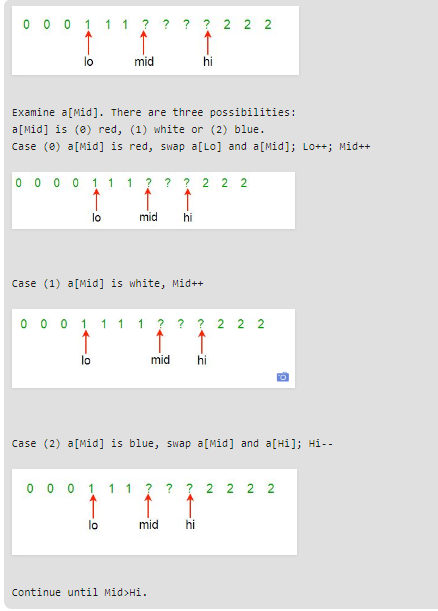

In [121]:
// Sort the input array, the array is assumed to 
// have values in {0, 1, 2} 
static void sort012(int a[], int arr_size) 
{ 
    int lo = 0; 
    int hi = arr_size - 1; 
    int mid = 0, temp = 0; 
    while (mid <= hi) { 
        switch (a[mid]) { 
        case 0: { 
            temp = a[lo]; 
            a[lo] = a[mid]; 
            a[mid] = temp; 
            lo++; 
            mid++; 
            break; 
        } 
        case 1: 
            mid++; 
            break; 
        case 2: { 
            temp = a[mid]; 
            a[mid] = a[hi]; 
            a[hi] = temp; 
            hi--; 
            break; 
        } 
        } 
    } 
} 

In [122]:
/* Utility function to print array arr[] */
static void printArray(int arr[], int arr_size) 
{ 
    int i; 
    for (i = 0; i < arr_size; i++) 
        System.out.print(arr[i] + " "); 
    System.out.println(""); 
} 

In [123]:
int arr[] = { 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1 }; 
int arr_size = arr.length; 
sort012(arr, arr_size); 
System.out.println("Array after seggregation "); 
printArray(arr, arr_size);

Array after seggregation 
0 0 0 0 0 1 1 1 1 1 2 2 


## **24. Merge Overlapping Intervals**
https://www.geeksforgeeks.org/merging-intervals/

In [124]:
/*
Given a set of time intervals in any order, 
merge all overlapping intervals into one and output the result which should have only mutually exclusive intervals. 
Let the intervals be represented as pairs of integers for simplicity.
For example, 
let the given set of intervals be {{1,3}, {2,4}, {5,7}, {6,8} }. 
The intervals {1,3} and {2,4} overlap with each other, so they should be merged and become {1, 4}. 
Similarly {5, 7} and {6, 8} should be merged and become {5, 8}
*/

In [125]:
/*
A simple approach is to start from the first interval and compare it with all other intervals for overlapping, 
if it overlaps with any other interval, then remove the other interval from list and merge the other into the first interval. 
Repeat the same steps for remaining intervals after first. 
This approach cannot be implemented in better than O(n^2) time.
*/

In [126]:
/*
An efficient approach is to first sort the intervals according to starting time. 
Once we have the sorted intervals, we can combine all intervals in a linear traversal. 
The idea is, in sorted array of intervals, 
if interval[i] doesn’t overlap with interval[i-1], 
then interval[i+1] cannot overlap with interval[i-1] 
because starting time of interval[i+1] must be greater than or equal to interval[i]. 
Following is the detailed step by step algorithm.
Time complexity of the method is O(nLogn) which is for sorting. 
Once the array of intervals is sorted, merging takes linear time.
*/

In [127]:
/*
1. Sort the intervals based on increasing order of 
    starting time.
2. Push the first interval on to a stack.
3. For each interval do the following
   a. If the current interval does not overlap with the stack 
       top, push it.
   b. If the current interval overlaps with stack top and ending
       time of current interval is more than that of stack top, 
       update stack top with the ending  time of current interval.
4. At the end stack contains the merged intervals. 
*/

In [128]:
class Interval 
{ 
    int start,end; 
    Interval(int start, int end) 
    { 
        this.start=start; 
        this.end=end; 
    } 
} 

In [129]:
public void mergeIntervals(Interval arr[])  
{  
    // Test if the given set has at least one interval  
    if (arr.length <= 0)  
        return;  

    // Create an empty stack of intervals  
    Stack<Interval> stack=new Stack<>(); 

    // sort the intervals in increasing order of start time  
    Arrays.sort(arr,new Comparator<Interval>(){ 
        public int compare(Interval i1,Interval i2) 
        { 
            return i1.start-i2.start; 
        } 
    }); 

    // push the first interval to stack  
    stack.push(arr[0]);  

    // Start from the next interval and merge if necessary  
    for (int i = 1 ; i < arr.length; i++)  
    {  
        // get interval from stack top  
        Interval top = stack.peek();  

        // if current interval is not overlapping with stack top,  
        // push it to the stack  
        if (top.end < arr[i].start)  
            stack.push(arr[i]);  

        // Otherwise update the ending time of top if ending of current  
        // interval is more  
        else if (top.end < arr[i].end)  
        {  
            top.end = arr[i].end;  
            stack.pop();  
            stack.push(top);  
        }  
    }  

    // Print contents of stack  
    System.out.print("The Merged Intervals are: "); 
    while (!stack.isEmpty())  
    {  
        Interval t = stack.pop();  
        System.out.print("["+t.start+","+t.end+"] "); 
    }   
}   

In [130]:
Interval arr[]=new Interval[4]; 
arr[0]=new Interval(6,8); 
arr[1]=new Interval(1,9); 
arr[2]=new Interval(2,4); 
arr[3]=new Interval(4,7); 
mergeIntervals(arr);

The Merged Intervals are: [1,9] 

In [131]:
/*
A O(n Log n) and O(1) Extra Space Solution
The above solution requires O(n) extra space for stack. 
We can avoid use of extra space by doing merge operations in-place. Below are detailed steps.

1) Sort all intervals in decreasing order of start time.
2) Traverse sorted intervals starting from first interval, 
   do following for every interval.
      a) If current interval is not first interval and it 
         overlaps with previous interval, then merge it with
         previous interval. Keep doing it while the interval
         overlaps with the previous one.         
      b) Else add current interval to output list of intervals.
Note that if intervals are sorted by decreasing order of start times, 
we can quickly check if intervals overlap or not by comparing start time of previous interval with end time of current interval.
*/

https://youtu.be/WdgAKCnWnwA

In [132]:
public static void mergeIntervals(Interval arr[])  
{  
    // Sort Intervals in decreasing order of  
    // start time  
    Arrays.sort(arr,new Comparator<Interval>(){ 
        public int compare(Interval i1,Interval i2) 
        { 
            return i2.start - i1.start; 
        } 
    }); 

    int index = 0; // Stores index of last element  
    // in output array (modified arr[])  

    // Traverse all input Intervals  
    for (int i=1; i<arr.length; i++)  
    {  
        // If this is not first Interval and overlaps  
        // with the previous one  
        if (arr[index].end >=  arr[i].start)  
        {  
               // Merge previous and current Intervals  
            arr[index].end = Math.max(arr[index].end, arr[i].end);  
            arr[index].start = Math.min(arr[index].start, arr[i].start);  
        }  
        else { 
            arr[index] = arr[i];  
            index++; 
        }     
    } 

    // Now arr[0..index-1] stores the merged Intervals  
    System.out.print("The Merged Intervals are: "); 
    for (int i = 0; i <= index; i++)  
    { 
        System.out.print("[" + arr[i].start + "," 
                                    + arr[i].end + "]");  
    } 
} 

In [133]:
Interval arr[]=new Interval[4]; 
arr[0]=new Interval(6,8); 
arr[1]=new Interval(1,9); 
arr[2]=new Interval(2,4); 
arr[3]=new Interval(4,7); 
mergeIntervals(arr);

The Merged Intervals are: [1,9]

## **25. Maximum profit by buying and selling a share at most twice**
https://www.geeksforgeeks.org/maximum-profit-by-buying-and-selling-a-share-at-most-twice/

In [134]:
/*
In a daily share trading, a buyer buys shares in the morning and sells it on the same day. 
If the trader is allowed to make at most 2 transactions in a day, 
whereas the second transaction can only start after the first one is complete (Sell->buy->sell->buy). 
Given stock prices throughout the day, find out the maximum profit that a share trader could have made.
*/

In [135]:
/*
Examples:

Input:   price[] = {10, 22, 5, 75, 65, 80}
Output:  87
Trader earns 87 as sum of 12 and 75
Buy at price 10, sell at 22, buy at 5 and sell at 80

Input:   price[] = {2, 30, 15, 10, 8, 25, 80}
Output:  100
Trader earns 100 as sum of 28 and 72
Buy at price 2, sell at 30, buy at 8 and sell at 80

Input:   price[] = {100, 30, 15, 10, 8, 25, 80};
Output:  72
Buy at price 8 and sell at 80.

Input:   price[] = {90, 80, 70, 60, 50}
Output:  0
Not possible to earn.
*/

In [136]:
/*
A Simple Solution is to consider every index ‘i’ and do following
Max profit with at most two transactions =
       MAX {max profit with one transaction and subarray price[0..i] +
            max profit with one transaction and aubarray price[i+1..n-1]  }
i varies from 0 to n-1. 
Maximum possible using one transaction can be calculated using the following O(n) algorithm (P 27.)
Time complexity of above simple solution is O(n2).
*/

In [137]:
/*
We can do this O(n) using following Efficient Solution. 
The idea is to store the maximum possible profit of every subarray and solve the problem in the following two phases.

1) Create a table profit[0..n-1] and initialize all values in it 0.
2) Traverse price[] from right to left and update profit[i] such that profit[i] stores maximum profit achievable from one transaction in subarray price[i..n-1]
3) Traverse price[] from left to right and update profit[i] such that profit[i] stores maximum profit such that profit[i] contains maximum achievable profit from two transactions in subarray price[0..i].
4) Return profit[n-1]

To do step 2, we need to keep track of the maximum price from right to left side 
and to do step 3, we need to keep track of the minimum price from left to right. 
Why we traverse in reverse directions? 
The idea is to save space, 
in the third step, we use the same array for both purposes, maximum with 1 transaction and maximum with 2 transactions. 
After iteration i, the array profit[0..i] contains the maximum profit with 2 transactions and profit[i+1..n-1] contains profit with two transactions.

Below are implementations of the above idea.
*/

In [138]:
// Returns maximum profit with two transactions on a given 
// list of stock prices, price[0..n-1] 
static int maxProfit(int price[], int n) 
{ 
    // Create profit array and initialize it as 0 
    int profit[] = new int[n]; 
    for (int i=0; i<n; i++) 
        profit[i] = 0; 

    /* Get the maximum profit with only one transaction 
       allowed. After this loop, profit[i] contains maximum 
       profit from price[i..n-1] using at most one trans. */
    int max_price = price[n-1]; 
    for (int i=n-2;i>=0;i--) 
    { 
        // max_price has maximum of price[i..n-1] 
        if (price[i] > max_price) 
            max_price = price[i]; 

        // we can get profit[i] by taking maximum of: 
        // a) previous maximum, i.e., profit[i+1] 
        // b) profit by buying at price[i] and selling at 
        //    max_price 
        profit[i] = Math.max(profit[i+1], max_price-price[i]); 
    } 

    /* Get the maximum profit with two transactions allowed 
       After this loop, profit[n-1] contains the result */
    int min_price = price[0]; 
    for (int i=1; i<n; i++) 
    { 
        // min_price is minimum price in price[0..i] 
        if (price[i] < min_price) 
            min_price = price[i]; 

        // Maximum profit is maximum of: 
        // a) previous maximum, i.e., profit[i-1] 
        // b) (Buy, Sell) at (min_price, price[i]) and add 
        //    profit of other trans. stored in profit[i] 
        profit[i] = Math.max(profit[i-1], profit[i] + 
                                    (price[i]-min_price) ); 
    } 
    int result = profit[n-1]; 
    return result; 
} 

In [139]:
int price[] = {2, 30, 15, 10, 8, 25, 80}; 
int n = price.length; 
System.out.println("Maximum Profit = "+ maxProfit(price, n)); 

Maximum Profit = 100


## **26. Maximum profit by buying and selling a share at most k times**
https://www.geeksforgeeks.org/maximum-profit-by-buying-and-selling-a-share-at-most-k-times/

In [140]:
/*
In share trading, a buyer buys shares and sells on a future date. 
Given the stock price of n days, the trader is allowed to make at most k transactions, 
where a new transaction can only start after the previous transaction is complete, 
find out the maximum profit that a share trader could have made.
*/

In [141]:
/*
Examples:

Input:  
Price = [10, 22, 5, 75, 65, 80]
    K = 2
Output:  87
Trader earns 87 as sum of 12 and 75
Buy at price 10, sell at 22, buy at 
5 and sell at 80

Input:  
Price = [12, 14, 17, 10, 14, 13, 12, 15]
    K = 3
Output:  12
Trader earns 12 as the sum of 5, 4 and 3
Buy at price 12, sell at 17, buy at 10 
and sell at 14 and buy at 12 and sell
at 15
 
Input:  
Price = [100, 30, 15, 10, 8, 25, 80]
    K = 3
Output:  72
Only one transaction. Buy at price 8 
and sell at 80.

Input:  
Price = [90, 80, 70, 60, 50]
    K = 1
Output:  0
Not possible to earn. 
*/

In [142]:
/*
The problem can be solved by using dynamic programming.
*/

In [143]:
/*
Let profit[t][i] represent maximum profit using at most t transactions up to day i (including day i). 
Then the relation is:
    profit[t][i] = max(profit[t][i-1], max(price[i] – price[j] + profit[t-1][j]))
          for all j in range [0, i-1]

profit[t][i] will be maximum of –
    1. profit[t][i-1] which represents not doing any transaction on the ith day.
    2. Maximum profit gained by selling on ith day. 
       In order to sell shares on ith day, we need to purchase it on any one of [0, i – 1] days. 
       If we buy shares on jth day and sell it on ith day, max profit will be price[i] – price[j] + profit[t-1][j] where j varies from 0 to i-1. 
       Here profit[t-1][j] is best we could have done with one less transaction till jth day.
Below is Dynamic Programming based implementation.
time complexity of O(k.n2)
*/

In [144]:
// Function to find out  
// maximum profit by  
// buying & selling a  
// share atmost k times 
// given stock price of n days 
static int maxProfit(int[] price,  
                     int n,  
                     int k) 
{ 

    // table to store results 
    // of subproblems 
    // profit[t][i] stores  
    // maximum profit using  
    // atmost t transactions up 
    // to day i (including day i) 
    int[][] profit = new int[k + 1][n + 1]; 

    // For day 0, you can't  
    // earn money irrespective 
    // of how many times you trade 
    for (int i = 0; i <= k; i++) 
        profit[i][0] = 0; 

    // profit is 0 if we don't 
    // do any transation 
    // (i.e. k =0) 
    for (int j = 0; j <= n; j++) 
        profit[0][j] = 0; 

    // fill the table in  
    // bottom-up fashion 
    for (int i = 1; i <= k; i++)  
    { 
        for (int j = 1; j < n; j++) 
        { 
            int max_so_far = 0; 

            for (int m = 0; m < j; m++) 
            max_so_far = Math.max(max_so_far, price[j] - 
                         price[m] + profit[i - 1][m]); 

            profit[i][j] = Math.max(profit[i] [j - 1],  
                                          max_so_far); 
        } 
    } 

    return profit[k][n - 1]; 
}

public static void main(String []args) 
{ 
    int k = 2;
    
    int[] price = { 10, 22, 5, 75, 65, 80 }; 
    int n = price.length; 
    System.out.println("Maximum profit is: " +  
                        maxProfit(price, n, k)); 
} 
main(args)
    

CompilationException: 

In [145]:
/*
The above solution has time complexity of O(k.n2). 
It can be reduced if we are able to calculate the maximum profit gained by selling shares on the ith day in constant time.

profit[t][i] = max(profit [t][i-1], max(price[i] – price[j] + profit[t-1][j]))
                            for all j in range [0, i-1]

If we carefully notice,
    max(price[i] – price[j] + profit[t-1][j])
    for all j in range [0, i-1]
can be rewritten as,
    = price[i] + max(profit[t-1][j] – price[j])
      for all j in range [0, i-1]
    = price[i] + max(prevDiff, profit[t-1][i-1] – price[i-1])

where prevDiff is max(profit[t-1][j] – price[j])
                    for all j in range [0, i-2]
                    
                    
So, if we have already calculated max(profit[t-1][j] – price[j]) for all j in range [0, i-2], 
we can calculate it for j = i – 1 in constant time. 
In other words, we don’t have to look back in the range [0, i-1] anymore to find out best day to buy. 
We can determine that in constant time using below revised relation.

profit[t][i] = max(profit[t][i-1], price[i] + max(prevDiff, profit [t-1][i-1] – price[i-1])
where prevDiff is max(profit[t-1][j] – price[j]) for all j in range [0, i-2]

Below is its optimized implementation –
*/

In [146]:
// Function to find out maximum profit by 
// buying & selling/ a share atmost k times  
// given stock price of n days 
static int maxProfit(int price[],  
                     int n, int k) 
{ 

    // table to store results of subproblems 
    // profit[t][i] stores maximum profit 
    // using atmost t transactions up to day 
    // i (including day i) 
    int profit[][] = new int[k + 1][ n + 1]; 

    // For day 0, you can't earn money 
    // irrespective of how many times you trade 
    for (int i = 0; i <= k; i++) 
        profit[i][0] = 0; 

    // profit is 0 if we don't do any  
    // transation (i.e. k =0) 
    for (int j = 0; j <= n; j++) 
        profit[0][j] = 0; 

    // fill the table in bottom-up fashion 
    for (int i = 1; i <= k; i++)  
    { 
        int prevDiff = Integer.MIN_VALUE; 
        for (int j = 1; j < n; j++)  
        { 
            prevDiff = Math.max(prevDiff,  
                       profit[i - 1][j - 1] -  
                       price[j - 1]); 
            profit[i][j] = Math.max(profit[i][j - 1],  
                           price[j] + prevDiff); 
        } 
    } 

    return profit[k][n - 1]; 
} 

// Driver code 
public static void main (String[] args)  
{ 
    int k = 3; 
    int price[] = {12, 14, 17, 10, 14, 13, 12, 15}; 

    int n = price.length; 

    System.out.println("Maximum profit is: " +  
                        maxProfit(price, n, k)); 
} 
main(args)

CompilationException: 

In [147]:
/*
The time complexity of the above solution is O(kn) and space complexity is O(nk). 
Space complexity can further be reduced to O(n) as we use the result from the last transaction.
*/

## **27. Maximum difference between two elements such that larger element appears after the smaller number**
https://www.geeksforgeeks.org/maximum-difference-between-two-elements/

https://youtu.be/SO0bwMziLlU

In [148]:
/*
Given an array arr[] of integers, 
find out the maximum difference between any two elements such that larger element appears after the smaller number.

Examples :

Input : arr = {2, 3, 10, 6, 4, 8, 1}
Output : 8
Explanation : The maximum difference is between 10 and 2.

Input : arr = {7, 9, 5, 6, 3, 2}
Output : 2
Explanation : The maximum difference is between 9 and 7.
*/

In [149]:
/*
Method 1 (Simple)
Use two loops. 
In the outer loop, pick elements one by one 
and in the inner loop calculate the difference of the picked element with every other element in the array 
and compare the difference with the maximum difference calculated so far. 
Below is the implementation of the above approach :
Time Complexity : O(n^2)
Auxiliary Space : O(1)
*/

In [150]:
/* The function assumes that there are at least two 
   elements in array. 
   The function returns a negative value if the array is 
   sorted in decreasing order.  
   Returns 0 if elements are equal */
int maxDiff(int arr[], int arr_size)  
{ 
    int max_diff = arr[1] - arr[0]; 
    int i, j; 
    for (i = 0; i < arr_size; i++)  
    { 
        for (j = i + 1; j < arr_size; j++)  
        { 
            if (arr[j] - arr[i] > max_diff) 
                max_diff = arr[j] - arr[i]; 
        } 
    } 
    return max_diff; 
} 

int arr[] = {1, 2, 90, 10, 110}; 
System.out.println("Maximum differnce is " +  
                        maxDiff(arr, 5)); 

Maximum differnce is 109


In [151]:
/*
Method 2 (Tricky and Efficient)
In this method, instead of taking difference of the picked element with every other element, 
we take the difference with the minimum element found so far. So we need to keep track of 2 things:
1) Maximum difference found so far (max_diff).
2) Minimum number visited so far (min_element).

Time Complexity : O(n)
Auxiliary Space : O(1)
*/

In [152]:
int maxDiff(int arr[], int arr_size)  
{ 
    int max_diff = arr[1] - arr[0]; 
    int min_element = arr[0]; 
    int i; 
    for (i = 1; i < arr_size; i++)  
    { 
        if (arr[i] - min_element > max_diff) 
            max_diff = arr[i] - min_element; 
        if (arr[i] < min_element) 
            min_element = arr[i]; 
    } 
    return max_diff; 
} 

int arr[] = {1, 2, 90, 10, 110}; 
int size = arr.length; 
System.out.println("MaximumDifference is " +  
                        maxDiff(arr, size)); 

MaximumDifference is 109


## **28. Minimize the maximum difference between the heights**
https://www.geeksforgeeks.org/minimize-the-maximum-difference-between-the-heights/

In [153]:
/*
Given heights of n towers and a value k. 
We need to either increase or decrease height of every tower by k (only once) where k > 0. 
The task is to minimize the difference between the heights of the longest and the shortest tower after modifications, and output this difference.
*/

In [154]:
/*
Examples:

Input  : arr[] = {1, 15, 10}, k = 6
Output :  Maximum difference is 5.
Explanation : We change 1 to 6, 15 to 
9 and 10 to 4. Maximum difference is 5
(between 4 and 9). We can't get a lower
difference.

Input : arr[] = {1, 5, 15, 10} 
        k = 3   
Output : Maximum difference is 8
arr[] = {4, 8, 12, 7}

Input : arr[] = {4, 6} 
        k = 10
Output : Maximum difference is 2
arr[] = {14, 16} OR {-6, -4}

Input : arr[] = {6, 10} 
        k = 3
Output : Maximum difference is 2
arr[] = {9, 7} 

Input : arr[] = {1, 10, 14, 14, 14, 15}
        k = 6 
Output: Maximum difference is 5
arr[] = {7, 4, 8, 8, 8, 9} 

Input : arr[] = {1, 2, 3}
        k = 2 
Output: Maximum difference is 2
arr[] = {3, 4, 5} 
*/

In [155]:
/*
The idea is to sort all elements increasing order. 
And for all elements check if subtract(element-k) and add(element+k) makes any changes or not.

Time Complexity: O(n Log n)
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190710125831/MinimizeTheMaximumDifference-1024x805.png"/>

In [156]:
// Modifies the array by subtracting/adding 
// k to every element such that the difference 
// between maximum and minimum is minimized 
static int getMinDiff(int arr[], int n, int k) 
{ 
    if (n == 1) 
    return 0; 

    // Sort all elements 
    Arrays.sort(arr); 

    // Initialize result 
    int ans = arr[n-1] - arr[0]; 

    // Handle corner elements 
    int small = arr[0] + k; 
    int big = arr[n-1] - k; 
    int temp = 0; 

    if (small > big) 
    { 
        temp = small; 
        small = big; 
        big = temp; 
    } 

    // Traverse middle elements 
    for (int i = 1; i < n-1; i ++) 
    { 
        int subtract = arr[i] - k; 
        int add = arr[i] + k; 

        // If both subtraction and addition 
        // do not change diff 
        if (subtract >= small || add <= big) 
            continue; 

        // Either subtraction causes a smaller 
        // number or addition causes a greater 
        // number. Update small or big using 
        // greedy approach (If big - subtract 
        // causes smaller diff, update small 
        // Else update big) 
        if (big - subtract <= add - small) 
            small = subtract; 
        else
            big = add; 
    } 

    return Math.min(ans, big - small); 
} 

// Driver function to test the above function 
public static void main(String[] args) 
{ 
    int arr[] = {4, 6}; 
    int n = arr.length; 
    int k = 10; 
    System.out.println("Maximum difference is "+ 
                        getMinDiff(arr, n, k)); 
} 
main(args)

Maximum difference is 2


## **29. Move all zeroes to end of array**
https://www.geeksforgeeks.org/move-zeroes-end-array/

https://youtu.be/0jXTju134Hw

In [157]:
/*
Given an array of random numbers, 
Push all the zero’s of a given array to the end of the array. 
For example, 
    if the given arrays is {1, 9, 8, 4, 0, 0, 2, 7, 0, 6, 0}, 
    it should be changed to {1, 9, 8, 4, 2, 7, 6, 0, 0, 0, 0}. 
The order of all other elements should be same. 
Expected time complexity is O(n) and extra space is O(1).
*/

In [158]:
/*
Traverse the given array ‘arr’ from left to right. 
While traversing, maintain count of non-zero elements in array. 
Let the count be ‘count’. 
For every non-zero element arr[i], put the element at ‘arr[count]’ and increment ‘count’. 
After complete traversal, all non-zero elements have already been shifted to front end and ‘count’ is set as index of first 0. 
Now all we need to do is that run a loop which makes all elements zero from ‘count’ till end of the array.
*/

In [159]:
// Function which pushes all zeros to end of an array. 
static void pushZerosToEnd(int arr[], int n) 
{ 
    int count = 0;  // Count of non-zero elements 

    // Traverse the array. If element encountered is 
    // non-zero, then replace the element at index 'count' 
    // with this element 
    for (int i = 0; i < n; i++) 
        if (arr[i] != 0) 
            arr[count++] = arr[i]; // here count is 
                                   // incremented 

    // Now all non-zero elements have been shifted to 
    // front and 'count' is set as index of first 0. 
    // Make all elements 0 from count to end. 
    while (count < n) 
        arr[count++] = 0; 
} 

In [160]:
int arr[] = {1, 9, 8, 4, 0, 0, 2, 7, 0, 6, 0, 9}; 
int n = arr.length; 
pushZerosToEnd(arr, n); 
System.out.println("Array after pushing zeros to the back: "); 
for (int i=0; i<n; i++) 
    System.out.print(arr[i]+" ");

Array after pushing zeros to the back: 
1 9 8 4 2 7 6 9 0 0 0 0 

## **30. Minimum swaps required to bring all elements less than or equal to k together**
https://www.geeksforgeeks.org/minimum-swaps-required-bring-elements-less-equal-k-together/

In [161]:
/*
Given an array of n positive integers and a number k. 
Find the minimum number of swaps required to bring all the numbers less than or equal to k together.
*/

In [162]:
/*
Input:  arr[] = {2, 1, 5, 6, 3}, k = 3
Output: 1

Explanation: 
To bring elements 2, 1, 3 together, swap 
element '5' with '3' such that final array
will be-
arr[] = {2, 1, 3, 6, 5}

Input:  arr[] = {2, 7, 9, 5, 8, 7, 4}, k = 5
Output: 2
*/

In [163]:
/*
A simple solution is to first count all elements less than or equals to k(say ‘good’). 
Now traverse for every sub-array and swap those elements whose value is greater than k. 
Time complexity of this approach is O(n2)
*/

In [164]:
/*
A simple approach is to use two pointer technique and sliding window.

Find count of all elements which are less than or equals to ‘k’. Let’s say the count is ‘cnt’
Using two pointer technique for window of length ‘cnt’, each time keep track of how many elements in this range are greater than ‘k’. Let’s say the total count is ‘bad’.
Repeat step 2, for every window of length ‘cnt’ and take minimum of count ‘bad’ among them. This will be the final answer.
*/

In [165]:
// Utility function to find minimum swaps 
// required to club all elements less than 
// or equals to k together 
static int minSwap(int arr[], int n, int k) { 
  
    // Find count of elements which are 
    // less than equals to k 
    int count = 0; 
    for (int i = 0; i < n; ++i) 
    if (arr[i] <= k) 
        ++count; 
  
    // Find unwanted elements in current 
    // window of size 'count' 
    int bad = 0; 
    for (int i = 0; i < count; ++i) 
    if (arr[i] > k) 
        ++bad; 
  
    // Initialize answer with 'bad' value of 
    // current window 
    int ans = bad; 
    for (int i = 0, j = count; j < n; ++i, ++j) { 
  
    // Decrement count of previous window 
    if (arr[i] > k) 
        --bad; 
  
    // Increment count of current window 
    if (arr[j] > k) 
        ++bad; 
  
    // Update ans if count of 'bad' 
    // is less in current window 
    ans = Math.min(ans, bad); 
    } 
    return ans; 
} 

In [166]:
int arr[] = {2, 1, 5, 6, 3}; 
int n = arr.length; 
int k = 3; 
System.out.print(minSwap(arr, n, k) + "\n"); 

int arr1[] = {2, 7, 9, 5, 8, 7, 4}; 
n = arr1.length; 
k = 5; 
System.out.print(minSwap(arr1, n, k)); 

1
2

## **31. Largest sum subarray with at-least k numbers**
https://www.geeksforgeeks.org/largest-sum-subarray-least-k-numbers/

In [167]:
/*
Given an array, find the subarray (containing at least k numbers) which has the largest sum.

Examples:

Input : arr[] = {-4, -2, 1, -3} 
            k = 2
Output : -1
The sub array is {-2, 1}

Input : arr[] = {1, 1, 1, 1, 1, 1} 
            k = 2
Output : 6 
The sub array is {1, 1, 1, 1, 1, 1}
*/

In [168]:
/*
This problem is an extension of Largest Sum Subarray Problem. (https://www.geeksforgeeks.org/largest-sum-contiguous-subarray/)
1) We first compute maximum sum till every index and store it in an array maxSum[].
2) After filling the array, we use the sliding window concept of size k. 
   Keep track of sum of current k elements. 
   To compute sum of current window, remove first element of previous window and add current element. 
   After getting the sum of current window, we add the maxSum of the previous window, 
   if it is greater than current max, then update it else not.

Below is the implementation of above approach:
Time Complexity: O(n)
*/

In [169]:
// Returns maximum sum of a subarray with at-least 
// k elements. 
static int maxSumWithK(int a[], int n, int k) 
{ 
    // maxSum[i] is going to store maximum sum 
    // till index i such that a[i] is part of the 
    // sum. 
    int maxSum[] = new int [n]; 
    maxSum[0] = a[0]; 

    // We use Kadane's algorithm to fill maxSum[] 
    // Below code is taken from method 3 of 
    // https://www.geeksforgeeks.org/largest-sum-contiguous-subarray/ 
    int curr_max = a[0]; 
    for (int i = 1; i < n; i++) 
    { 
        curr_max = Math.max(a[i], curr_max+a[i]); 
        maxSum[i] = curr_max; 
    } 

    // Sum of first k elements 
    int sum = 0; 
    for (int i = 0; i < k; i++) 
        sum += a[i]; 

    // Use the concept of sliding window 
    int result = sum; 
    for (int i = k; i < n; i++) 
    { 
        // Compute sum of k elements ending 
        // with a[i]. 
        sum = sum + a[i] - a[i-k]; 

        // Update result if required 
        result = Math.max(result, sum); 

        // Include maximum sum till [i-k] also 
        // if it increases overall max. 
        result = Math.max(result, sum + maxSum[i-k]); 
    } 
    return result; 
} 

In [170]:
int arr[] = {1, 2, 3, -10, -3}; 
int k = 4; 
System.out.println(maxSumWithK(arr, arr.length, k));

-4


## **32. Form minimum number from given sequence**
https://www.geeksforgeeks.org/form-minimum-number-from-given-sequence/

In [171]:
/*
Given a pattern containing only I’s and D’s. 
I for increasing and D for decreasing. Devise an algorithm to print the minimum number following that pattern. 
Digits from 1-9 and digits can’t repeat.

Examples:

   Input: D        Output: 21
   Input: I        Output: 12
   Input: DD       Output: 321
   Input: II       Output: 123
   Input: DIDI     Output: 21435
   Input: IIDDD    Output: 126543
   Input: DDIDDIID Output: 321654798 
*/

In [172]:
/*
Method 4 (Using two pointers)
Observation

1. Since we have to find minimum number without repeating digits, maximum length of output can be 9 (using each 1-9 digits once)
2. Length of the output will be exactly one greater than input length.
3. The idea is to iterate over the string and do the following if current character is ‘I’ or string is ended.
        i.Assign count in increasing order to each element from current-1 to the next left index of ‘I’ (or starting index is reached).
        ii.Increase the count by 1.

Time Complexity : O(N)
Auxiliary Space : O(1)
*/

In [173]:
/*
Input  :  IDID
Output : 13254

Input  :  I
Output : 12

Input  :  DD
Output : 321

Input  :  II
Output : 123

Input  :  DIDI
Output : 21435

Input  :  IIDDD
Output : 126543

Input  :  DDIDDIID
Output : 321654798
*/

In [174]:
// Returns minimum number made from given sequence without repeating digits 
static String getMinNumberForPattern(String seq) 
{ 
    int n = seq.length(); 

    if (n >= 9) 
        return "-1"; 

    char result[] = new char[n + 1]; 

    int count = 1; 

    // The loop runs for each input character as well as  
    // one additional time for assigning rank to each remaining characters 
    for (int i = 0; i <= n; i++) 
    { 
        if (i == n || seq.charAt(i) == 'I') 
        { 
            for (int j = i - 1; j >= -1; j--) 
            { 
                result[j + 1] = (char) ((int) '0' + count++); 
                if (j >= 0 && seq.charAt(j) == 'I') 
                    break; 
            } 
        } 
    } 
    return new String(result); 
} 

In [175]:
String inputs[] = { "IDID", "I", "DD", "II", "DIDI", "IIDDD", "DDIDDIID" }; 

for(String input : inputs) 
{ 
    System.out.println(getMinNumberForPattern(input)); 
} 

13254
12
321
123
21435
126543
321654798


## **33. Find the smallest positive integer value that cannot be represented as sum of any subset of a given array**
https://www.geeksforgeeks.org/find-smallest-value-represented-sum-subset-given-array/

In [176]:
/*
Given a sorted array (sorted in non-decreasing order) of positive numbers, 
find the smallest positive integer value that cannot be represented as sum of elements of any subset of given set.
Expected time complexity is O(n).
*/

In [177]:
/*
Examples:

Input:  arr[] = {1, 3, 6, 10, 11, 15};
Output: 2

Input:  arr[] = {1, 1, 1, 1};
Output: 5

Input:  arr[] = {1, 1, 3, 4};
Output: 10

Input:  arr[] = {1, 2, 5, 10, 20, 40};
Output: 4

Input:  arr[] = {1, 2, 3, 4, 5, 6};
Output: 22
*/

In [178]:
/*
A Simple Solution is to start from value 1 and check all values one by one if they can sum to values in the given array. 
This solution is very inefficient as it reduces to subset sum problem which is a well known NP Complete Problem.
*/

In [179]:
/*
We can solve this problem in O(n) time using a simple loop. 
Let the input array be arr[0..n-1]. 
We initialize the result as 1 (smallest possible outcome) and traverse the given array. 
Let the smallest element that cannot be represented by elements at indexes from 0 to (i-1) be ‘res’, 
there are following two possibilities when we consider element at index i:

1) We decide that ‘res’ is the final result: 
    If arr[i] is greater than ‘res’, 
    then we found the gap which is ‘res’ because the elements after arr[i] are also going to be greater than ‘res’.

2) The value of ‘res’ is incremented after considering arr[i]: 
    The value of ‘res’ is incremented by arr[i] 
    (why? If elements from 0 to (i-1) can represent 1 to ‘res-1’, 
          then elements from 0 to i can represent from 1 to ‘res + arr[i] – 1’ be adding ‘arr[i]’ to all subsets that represent 1 to ‘res’)
*/

In [180]:
// Returns the smallest number that cannot be represented as sum 
// of subset of elements from set represented by sorted array arr[0..n-1] 
int findSmallest(int arr[], int n)  
{ 
    int res = 1; // Initialize result 

    // Traverse the array and increment 'res' if arr[i] is 
    // smaller than or equal to 'res'. 
    for (int i = 0; i < n && arr[i] <= res; i++) 
        res = res + arr[i]; 

    return res; 
} 

In [181]:
int arr1[] = {1, 3, 4, 5}; 
int n1 = arr1.length; 
System.out.println(findSmallest(arr1, n1)); 

int arr2[] = {1, 2, 6, 10, 11, 15}; 
int n2 = arr2.length; 
System.out.println(findSmallest(arr2, n2)); 

int arr3[] = {1, 1, 1, 1}; 
int n3 = arr3.length; 
System.out.println(findSmallest(arr3, n3)); 

int arr4[] = {1, 1, 3, 4}; 
int n4 = arr4.length; 
System.out.println(findSmallest(arr4, n4)); 

2
4
5
10


## **34. Generate all possible sorted arrays from alternate elements of two given sorted arrays**
https://www.geeksforgeeks.org/generate-all-possible-sorted-arrays-from-alternate-elements-of-two-given-arrays/

In [182]:
/*
Given two sorted arrays A and B, 
generate all possible arrays such that first element is taken from A then from B then from A and so on in increasing order till the arrays exhausted. 
The generated arrays should end with an element from B.
*/

In [183]:
/*
For Example
 
A = {10, 15, 25}
B = {1, 5, 20, 30}

The resulting arrays are:
  10 20
  10 20 25 30
  10 30
  15 20
  15 20 25 30
  15 30
  25 30
*/

In [184]:
/*
The idea is to use recursion. 
In the recursive function, a flag is passed to indicate whether current element in output should be taken from ‘A’ or ‘B’.
*/

In [185]:
/* Function to generates and prints all sorted arrays from alternate 
   elements of 'A[i..m-1]' and 'B[j..n-1]' 
   If 'flag' is true, then current element is to be included from A  
   otherwise from B. 
   'len' is the index in output array C[]. We print output array   
   each time before including a character from A only if length of  
   output array is greater than 0. We try than all possible  
   combinations */
void generateUtil(int A[], int B[], int C[], int i, int j, int m, int n, 
        int len, boolean flag)  
{ 
    if (flag) // Include valid element from A 
    { 
        // Print output if there is at least one 'B' in output array 'C' 
        if (len != 0)  
            printArr(C, len + 1); 

        // Recur for all elements of A after current index 
        for (int k = i; k < m; k++)  
        { 
            if (len == 0)  
            { 
                /* this block works for the very first call to include 
                the first element in the output array */
                C[len] = A[k]; 

                // don't increment lem as B is included yet 
                generateUtil(A, B, C, k + 1, j, m, n, len, !flag); 
            }  

            /* include valid element from A and recur */
            else if (A[k] > C[len])  
            { 
                    C[len + 1] = A[k]; 
                    generateUtil(A, B, C, k + 1, j, m, n, len + 1, !flag); 
            } 
        } 
    }  

    /* Include valid element from B and recur */
    else
    { 
        for (int l = j; l < n; l++)  
        { 
            if (B[l] > C[len])  
            { 
                C[len + 1] = B[l]; 
                generateUtil(A, B, C, i, l + 1, m, n, len + 1, !flag); 
            } 
        } 
    } 
} 

In [186]:
/* Wrapper function */
void generate(int A[], int B[], int m, int n)  
{ 
    int C[] = new int[m + n]; 

    /* output array */
    generateUtil(A, B, C, 0, 0, m, n, 0, true); 
} 

// A utility function to print an array 
void printArr(int arr[], int n)  
{ 
    for (int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 
    System.out.println(""); 
} 

public static void main(String[] args)  
{  
    int A[] = {10, 15, 25}; 
    int B[] = {5, 20, 30}; 
    int n = A.length; 
    int m = B.length; 
    generate(A, B, n, m); 
} 
main(args)

CompilationException: 

## **35. Next Permutation**
https://leetcode.com/problems/next-permutation/description/

In [187]:
/*
Implement next permutation, which rearranges numbers into the lexicographically next greater permutation of numbers.
If such arrangement is not possible, it must rearrange it as the lowest possible order (ie, sorted in ascending order).
The replacement must be in-place and use only constant extra memory.
Here are some examples. Inputs are in the left-hand column and its corresponding outputs are in the right-hand column.

1,2,3 → 1,3,2
3,2,1 → 1,2,3
1,1,5 → 1,5,1
*/

https://leetcode.com/problems/next-permutation/solution/

<img src = "https://leetcode.com/media/original_images/31_Next_Permutation.gif"/>

In [188]:
/*
Algorithm

First, we observe that for any given sequence that is in descending order, no next larger permutation is possible. 
For example, no next permutation is possible for the following array:
[9, 5, 4, 3, 1]

We need to find the first pair of two successive numbers a[i] and a[i−1], from the right, which satisfy a[i] > a[i-1]. 
Now, no rearrangements to the right of a[i-1]a[i−1] can create a larger permutation since that subarray consists of numbers in descending order. 
Thus, we need to rearrange the numbers to the right of a[i-1]a[i−1] including itself.

Now, what kind of rearrangement will produce the next larger number? 
We want to create the permutation just larger than the current one. 
Therefore, we need to replace the number a[i-1]a[i−1] with the number which is just larger than itself among the numbers lying to its right section, say a[j]a[j].


We swap the numbers a[i-1]a[i−1] and a[j]a[j]. 
We now have the correct number at index i-1i−1. 
But still the current permutation isn't the permutation that we are looking for.
We need the smallest permutation that can be formed by using the numbers only to the right of a[i-1]a[i−1]. 
Therefore, we need to place those numbers in ascending order to get their smallest permutation.

But, recall that while scanning the numbers from the right, we simply kept decrementing the index until we found the pair a[i]a[i] and a[i-1]a[i−1] where, a[i] > a[i-1]a[i]>a[i−1]. 
Thus, all numbers to the right of a[i-1]a[i−1] were already sorted in descending order. 
Furthermore, swapping a[i-1]a[i−1] and a[j]a[j] didn't change that order. 
Therefore, we simply need to reverse the numbers following a[i-1]a[i−1] to get the next smallest lexicographic permutation.
*/

<img src = "https://leetcode.com/media/original_images/31_nums_graph.png"/>

In [189]:
public class Solution {
    public static void nextPermutation(int[] nums) {
        int i = nums.length - 2;
        while (i >= 0 && nums[i + 1] <= nums[i]) {
            i--;
        }
        if (i >= 0) {
            int j = nums.length - 1;
            while (j >= 0 && nums[j] <= nums[i]) {
                j--;
            }
            swap(nums, i, j);
        }
        reverse(nums, i + 1);
    }

    private static void reverse(int[] nums, int start) {
        int i = start, j = nums.length - 1;
        while (i < j) {
            swap(nums, i, j);
            i++;
            j--;
        }
    }

    private static void swap(int[] nums, int i, int j) {
        int temp = nums[i];
        nums[i] = nums[j];
        nums[j] = temp;
    }
}


void printArr(int[] arr){
    for(int val:arr){
        System.out.print(val+" ");
    }
    System.out.println();
}

In [190]:
int[] arr1 = {1,2,3};
int[] arr2 = {3,2,1};
int[] arr3 = {1,1,5};
Solution.nextPermutation(arr1);
Solution.nextPermutation(arr2);
Solution.nextPermutation(arr3);
printArr(arr1);
printArr(arr2);
printArr(arr3);

1 3 2 
1 2 3 
1 5 1 


## **36. Given an array arr[], find the maximum j – i such that arr[j] > arr[i]**
https://www.geeksforgeeks.org/given-an-array-arr-find-the-maximum-j-i-such-that-arrj-arri/

In [191]:
/*
Given an array arr[], find the maximum j – i such that arr[j] > arr[i].
Examples :

  Input: {34, 8, 10, 3, 2, 80, 30, 33, 1}
  Output: 6  (j = 7, i = 1)

  Input: {9, 2, 3, 4, 5, 6, 7, 8, 18, 0}
  Output: 8 ( j = 8, i = 0)

  Input:  {1, 2, 3, 4, 5, 6}
  Output: 5  (j = 5, i = 0)

  Input:  {6, 5, 4, 3, 2, 1}
  Output: -1 
*/

In [192]:
/*
Method 1 (Simple but Inefficient)
Run two loops. 
In the outer loop, pick elements one by one from left. 
In the inner loop, compare the picked element with the elements starting from right side. 
Stop the inner loop when you see an element greater than the picked element and keep updating the maximum j-i so far.

Time Complexity : O(n^2)
*/

In [193]:
/* For a given array arr[], returns the maximum j-i such that 
   arr[j] > arr[i] */
int maxIndexDiff(int arr[], int n)  
{ 
    int maxDiff = -1; 
    int i, j; 

    for (i = 0; i < n; ++i)  
    { 
        for (j = n - 1; j > i; --j)  
        { 
            if (arr[j] > arr[i] && maxDiff < (j - i)) 
                maxDiff = j - i; 
        } 
    } 

    return maxDiff; 
}

In [194]:
int arr[] = {9, 2, 3, 4, 5, 6, 7, 8, 18, 0}; 
int n = arr.length; 
int maxDiff = maxIndexDiff(arr, n); 
System.out.println(maxDiff); 

8


In [195]:
/*
Method 3 (Efficient)
To solve this problem, 
we need to get two optimum indexes of arr[]: left index i and right index j. 
For an element arr[i], we do not need to consider arr[i] for left index if there is an element smaller than arr[i] on left side of arr[i]. 
Similarly, if there is a greater element on right side of arr[j] then we do not need to consider this j for right index. 
So we construct two auxiliary arrays LMin[] and RMax[] 
such that LMin[i] holds the smallest element on left side of arr[i] including arr[i], 
and RMax[j] holds the greatest element on right side of arr[j] including arr[j]. 
After constructing these two auxiliary arrays, we traverse both of these arrays from left to right. 
While traversing LMin[] and RMa[] if we see that LMin[i] is greater than RMax[j], 
then we must move ahead in LMin[] (or do i++) because all elements on left of LMin[i] are greater than or equal to LMin[i]. 
Otherwise we must move ahead in RMax[j] to look for a greater j – i value.
*/

In [196]:
/* For a given array arr[], returns the maximum j-i such that 
   arr[j] > arr[i] */
int maxIndexDiff(int arr[], int n)  
{ 
    int maxDiff; 
    int i, j; 

    int RMax[] = new int[n]; 
    int LMin[] = new int[n]; 

    /* Construct LMin[] such that LMin[i] stores the minimum value 
       from (arr[0], arr[1], ... arr[i]) */
    LMin[0] = arr[0]; 
    for (i = 1; i < n; ++i) 
        LMin[i] = Math.min(arr[i], LMin[i - 1]); 

    /* Construct RMax[] such that RMax[j] stores the maximum value 
       from (arr[j], arr[j+1], ..arr[n-1]) */
    RMax[n - 1] = arr[n - 1]; 
    for (j = n - 2; j >= 0; --j) 
        RMax[j] = Math.max(arr[j], RMax[j + 1]); 

    /* Traverse both arrays from left to right to find optimum j - i 
       This process is similar to merge() of MergeSort */
    i = 0; j = 0; maxDiff = -1; 
    while (j < n && i < n)  
    { 
        if (LMin[i] < RMax[j])  
        { 
            maxDiff = Math.max(maxDiff, j - i); 
            j = j + 1; 
        }  
        else 
            i = i + 1; 
    } 

    return maxDiff; 
} 

In [197]:
int arr[] = {9, 2, 3, 4, 5, 6, 7, 8, 18, 0}; 
int n = arr.length; 
int maxDiff = maxIndexDiff(arr, n); 
System.out.println(maxDiff); 

8


## **37. Maximum Sum of 3 Non-Overlapping Subarrays**
https://leetcode.com/problems/maximum-sum-of-3-non-overlapping-subarrays/description/

In [198]:
/*
In a given array nums of positive integers, find three non-overlapping subarrays with maximum sum.

Each subarray will be of size k, and we want to maximize the sum of all 3*k entries.

Return the result as a list of indices representing the starting position of each interval (0-indexed). 
If there are multiple answers, return the lexicographically smallest one.
*/

In [199]:
/*
Example:

Input: [1,2,1,2,6,7,5,1], 2
Output: [0, 3, 5]
Explanation: Subarrays [1, 2], [2, 6], [7, 5] correspond to the starting indices [0, 3, 5].
We could have also taken [2, 1], but an answer of [1, 3, 5] would be lexicographically larger.
*/

In [200]:
/*
Approach #1: Ad-Hoc [Accepted]

Intuition
It is natural to consider an array W of each interval's sum, 
where each interval is the given length K. 
To create W, we can either use prefix sums, or manage the sum of the interval as a window slides along the array.

From there, we approach the reduced problem: 
    Given some array W and an integer K, what is the lexicographically smallest tuple of indices (i, j, k) with i + K <= j and j + K <= k that maximizes W[i] + W[j] + W[k]?
*/

In [201]:
/*
Algorithm

Suppose we fixed j. We would like to know on the intervals i∈[0,j−K] and k∈[j+K,len(W)−1], 
where the largest value of W[i]W[i] (and respectively W[k]W[k]) occurs first. (Here, first means the smaller index.)

We can solve these problems with dynamic programming. 
For example, 
if we know that i is where the largest value of W[i]W[i] occurs first on [0,5], then on [0,6] the first occurrence of the largest W[i]W[i] must be either i or 6. 
If say, 6 is better, then we set best = 6.

At the end, 
left[z] will be the first occurrence of the largest value of W[i] on the interval i∈[0,z], 
and right[z] will be the same but on the interval i∈[z,len(W)−1]. 
This means that for some choice j, the candidate answer must be (left[j-K], j, right[j+K]). 
We take the candidate that produces the maximum W[i] + W[j] + W[k].
*/

In [202]:
class Solution {
    public static int[] maxSumOfThreeSubarrays(int[] nums, int K) {
        //W is an array of sums of windows
        int[] W = new int[nums.length - K + 1];
        int sum = 0;
        for (int i = 0; i < nums.length; i++) {
            sum += nums[i];
            if (i >= K) sum -= nums[i-K];
            if (i >= K-1) W[i-K+1] = sum;
        }

        int[] left = new int[W.length];
        int best = 0;
        for (int i = 0; i < W.length; i++) {
            if (W[i] > W[best]) best = i;
            left[i] = best;
        }

        int[] right = new int[W.length];
        best = W.length - 1;
        for (int i = W.length - 1; i >= 0; i--) {
            if (W[i] >= W[best]) best = i;
            right[i] = best;
        }

        int[] ans = new int[]{-1, -1, -1};
        for (int j = K; j < W.length - K; j++) {
            int i = left[j - K], k = right[j + K];
            if (ans[0] == -1 || W[i] + W[j] + W[k] >
                    W[ans[0]] + W[ans[1]] + W[ans[2]]) {

                ans[0] = i;
                ans[1] = j;
                ans[2] = k;
            }
        }
        return ans;
    }
}

In [203]:
int[] arr = {1,2,1,2,6,7,5,1};
int[] res = Solution.maxSumOfThreeSubarrays(arr,2);
for(int val:res){
    System.out.print(val+" ");
}

0 3 5 

## **38. Number of subarrays with maximum values in given range**
https://www.geeksforgeeks.org/number-subarrays-maximum-value-given-range/

In [204]:
/*
Given an array of N elements and L and R, 
print the number of sub-arrays such that the value of the maximum array element in that subarray is at least L and at most R.

Examples:

Input : arr[] = {2, 0, 11, 3, 0}
          L = 1, R = 10
Output : 4 
Explanation: the sub-arrays {2}, {2, 0}, {3} 
and {3, 0} have maximum in range 1-10.

Input : arr[] = {3, 4, 1}
          L = 2, R = 4 
Output : 5
Explanation: the sub-arrays are {3}, {4}, 
{3, 4}, {4, 1} and {3, 4, 1} 
*/

In [205]:
/*
A naive approach will be to iterate for every sub-array 
and find the number of sub-arrays with maximum in range L-R. 
Time complexity of this solution is O(n*n)
*/

In [206]:
/*
An efficient approach is based on below facts :

Any element > R is never included in any subarray.
Any number of elements smaller than L can be included in subarray as long as there is at least one single element between L and R inclusive.
The number of all possible subarrays of an array of size N is N * (N + 1)/2. Let countSubarrays(N) = N * (N + 1)/2
We keep track of two counts in current subarray.
    1) Count of all elements smaller than or equal to R. We call it inc.
    2) Count of all elements smaller than L. We call it exc.

Our answer for current subarray is countSubarrays(inc) – countSubarrays(exc). 
We basically remove all those subarrays which are formed by only elements smaller than L.

Time Complexity: O(n)
*/

In [207]:
// function to calculate N*(N+1)/2 
static long countSubarrys(long n)  
{ 
    return n * (n + 1) / 2; 
} 
  
// function to count the number of  
// sub-arrays with maximum greater 
// then L and less then R. 
static long countSubarrays(int a[], int n, 
                             int L, int R)  
{ 
    long res = 0; 
  
    // exc is going to store count of elements 
    // smaller than L in current valid subarray. 
    // inc is going to store count of elements 
    // smaller than or equal to R. 
    long exc = 0, inc = 0; 
  
    // traverse through all elements of the array 
    for (int i = 0; i < n; i++) { 
  
    // If the element is greater than R, 
    // add current value to result and reset 
    // values of exc and inc. 
    if (a[i] > R) { 
        res += (countSubarrys(inc) - countSubarrys(exc)); 
        inc = 0; 
        exc = 0; 
    } 
  
    // if it is less than L, then it is included 
    // in the sub-arrays 
    else if (a[i] < L) { 
        exc++; 
        inc++; 
    } 
  
    // if >= L and <= R, then count of 
    // subarrays formed by previous chunk 
    // of elements formed by only smaller 
    // elements is reduced from result. 
    else { 
        res -= countSubarrys(exc); 
        exc = 0; 
        inc++; 
    } 
    } 
  
    // Update result. 
    res += (countSubarrys(inc) - countSubarrys(exc)); 
  
    // returns the count of sub-arrays 
    return res; 
} 

In [208]:
// Driver code 
public static void main(String arg[])  
{ 
    int a[] = {2, 0, 11, 3, 0}; 
    int n = a.length; 
    int l = 1, r = 10; 
    System.out.print(countSubarrays(a, n, l, r)); 
} 
main(args)

CompilationException: 

## **39. Print all possible combinations of r elements in a given array of size n**
https://www.geeksforgeeks.org/print-all-possible-combinations-of-r-elements-in-a-given-array-of-size-n/

In [209]:
/*
Given an array of size n, generate and print all possible combinations of r elements in array. 
For example, 
if input array is {1, 2, 3, 4} and r is 2, 
then output should be {1, 2}, {1, 3}, {1, 4}, {2, 3}, {2, 4} and {3, 4}.
*/

In [210]:
/*
Method 1 (Fix Elements and Recur)
We create a temporary array ‘data[]’ which stores all outputs one by one. 
The idea is to start from first index (index = 0) in data[], 
one by one fix elements at this index and recur for remaining indexes. 
Let the input array be {1, 2, 3, 4, 5} and r be 3. 
We first fix 1 at index 0 in data[], 
then recur for remaining indexes, 
then we fix 2 at index 0 and recur. 
Finally, we fix 3 and recur for remaining indexes. 
When number of elements in data[] becomes equal to r (size of a combination), we print data[].

Following diagram shows recursion tree for same input.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/tree12345.png"/>

In [211]:
/* arr[]  ---> Input Array 
data[] ---> Temporary array to store current combination 
start & end ---> Staring and Ending indexes in arr[] 
index  ---> Current index in data[] 
r ---> Size of a combination to be printed */
static void combinationUtil(int arr[], int data[], int start, 
                            int end, int index, int r) 
{ 
    // Current combination is ready to be printed, print it 
    if (index == r) 
    { 
        for (int j=0; j<r; j++) 
            System.out.print(data[j]+" "); 
        System.out.println(""); 
        return; 
    } 

    // replace index with all possible elements. The condition 
    // "end-i+1 >= r-index" makes sure that including one element 
    // at index will make a combination with remaining elements 
    // at remaining positions 
    for (int i=start; i<=end && end-i+1 >= r-index; i++) 
    { 
        data[index] = arr[i]; 
        combinationUtil(arr, data, i+1, end, index+1, r); 
    } 
} 

// The main function that prints all combinations of size r 
// in arr[] of size n. This function mainly uses combinationUtil() 
static void printCombination(int arr[], int n, int r) 
{ 
    // A temporary array to store all combination one by one 
    int data[]=new int[r]; 

    // Print all combination using temprary array 'data[]' 
    combinationUtil(arr, data, 0, n-1, 0, r); 
} 

In [212]:
/*Driver function to check for above function*/
public static void main (String[] args) { 
    int arr[] = {1, 2, 3, 4, 5}; 
    int r = 3; 
    int n = arr.length; 
    printCombination(arr, n, r); 
} 
main(args)

CompilationException: 

In [213]:
/*
Method 2 (Include and Exclude every element)
Like the above method, We create a temporary array data[]. 
The idea here is similar to Subset Sum Problem. (https://www.geeksforgeeks.org/subset-sum-problem-dp-25/)
We one by one consider every element of input array, and recur for two cases:

1) The element is included in current combination (We put the element in data[] and increment next available index in data[])
2) The element is excluded in current combination (We do not put the element and do not change index)

When number of elements in data[] become equal to r (size of a combination), we print it.

This method is mainly based on Pascal’s Identity, i.e. ncr = n-1cr + n-1cr-1

Following is implementation of method 2.
*/

In [214]:
/*
PASCAL RULE :

In mathematics, Pascal's rule (or Pascal's formula) is a combinatorial identity about binomial coefficients. 
It states that for positive natural numbers n and k,
where right side of = is a binomial coefficient; 
one interpretation of which is the coefficient of the x^k term in the expansion of (1 + x)^n. 
There is no restriction on the relative sizes of n and k, since, 
if n < k the value of the binomial coefficient is zero and the identity remains valid.
*/


<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/50fc81ac7a665ee200b71104e64d7c31d9abcbb0"/>

In [215]:
/* arr[]  ---> Input Array 
data[] ---> Temporary array to store current combination 
start & end ---> Staring and Ending indexes in arr[] 
index  ---> Current index in data[] 
r ---> Size of a combination to be printed */
static void combinationUtil(int arr[], int n, int r, int index, 
                            int data[], int i) 
{ 
    // Current combination is ready to be printed, print it 
    if (index == r) 
    { 
        for (int j=0; j<r; j++) 
            System.out.print(data[j]+" "); 
        System.out.println(""); 
    return; 
    } 

    // When no more elements are there to put in data[] 
    if (i >= n) 
    return; 

    // current is included, put next at next location 
    data[index] = arr[i]; 
    combinationUtil(arr, n, r, index+1, data, i+1); 

    // current is excluded, replace it with next (Note that 
    // i+1 is passed, but index is not changed) 
    combinationUtil(arr, n, r, index, data, i+1); 
} 

// The main function that prints all combinations of size r 
// in arr[] of size n. This function mainly uses combinationUtil() 
static void printCombination(int arr[], int n, int r) 
{ 
    // A temporary array to store all combination one by one 
    int data[]=new int[r]; 

    // Print all combination using temprary array 'data[]' 
    combinationUtil(arr, n, r, 0, data, 0); 
} 

In [216]:
/*Driver function to check for above function*/
public static void main (String[] args) { 
    int arr[] = {1, 2, 3, 4, 5}; 
    int r = 3; 
    int n = arr.length; 
    printCombination(arr, n, r); 
}
main(args)

CompilationException: 

In [217]:
/*
How to handle duplicates in method 2?
Like method 1, we can following two things to handle duplicates.
1) Add code to sort the array before calling combinationUtil() in printCombination()
2) Add following lines between two recursive calls of combinationUtil() in combinationUtil()

        // Since the elements are sorted, all occurrences of an element
        // must be together
        while (arr[i] == arr[i+1])
             i++; 
*/

## **40. Longest subarray with sum divisible by k**
https://www.geeksforgeeks.org/longest-subarray-sum-divisible-k/

In [218]:
/*
Given an arr[] containing n integers and a positive integer k. 
The problem is to find the length of the longest subarray with sum of the elements divisible by the given value k.

Examples:

Input : arr[] = {2, 7, 6, 1, 4, 5}, k = 3
Output : 4
The subarray is {7, 6, 1, 4} with sum 18,
which is divisible by 3.

Input : arr[] = {-2, 2, -5, 12, -11, -1, 7}
Output : 5

*/

In [219]:
/*
Method 1 (Naive Approach): 
Consider all the subarrays and return the length of the subarray with sum divisible by k and has the longest length.
Time Complexity: O(n^2).
*/

In [220]:
/*
Method 2 (Efficient Approach): 
Create an array mod_arr[] where mod_arr[i] stores (sum(arr[0]+arr[1]..+arr[i]) % k). 
Create a hash table having tuple as (ele, idx), 
where ele represents an element of mod_arr[] and idx represents the element’s index of first occurrence in mod_arr[]. 
Now, traverse mod_arr[] from i = 0 to n 
and follow the steps given below.

If mod_arr[i] == 0, then update maxLen = (i + 1).
Else if mod_arr[i] is not present in the hash table, then create tuple (mod_arr[i], i) in the hash table.
Else, get the value associated with mod_arr[i] in the hash table. Let this be idx.
If maxLen < (i – idx), then update maxLen = (i – idx).
Finally return maxLen.

Time Complexity: O(n).
Auxiliary Space: O(n^2).
*/

In [221]:
// function to find the longest subarray 
// with sum divisible by k 
static int longSubarrWthSumDivByK(int arr[],  
                                  int n, int k) 
{ 
    // unodered map 'um' implemented as 
    // hash table 
    HashMap<Integer, Integer> um= new HashMap<Integer, Integer>(); 

    // 'mod_arr[i]' stores (sum[0..i] % k) 
    int mod_arr[]= new int[n]; 
    int max = 0; 
    int curr_sum = 0; 

    // traverse arr[] and build up the 
    // array 'mod_arr[]' 
    for (int i = 0; i < n; i++) 
    { 
        curr_sum += arr[i]; 

        // as the sum can be negative,  
        // taking modulo twice 
        mod_arr[i] = ((curr_sum % k) + k) % k;      
    }  

    for (int i = 0; i < n; i++) 
    { 
        // if true then sum(0..i) is  
        // divisible by k 
        if (mod_arr[i] == 0) 
            // update 'max' 
            max = i + 1; 

        // if value 'mod_arr[i]' not present in 'um' 
        // then store it in 'um' with index of its 
        // first occurrence      
        else if (um.containsKey(mod_arr[i]) == false) 
            um.put(mod_arr[i] , i); 

        else
            // if true, then update 'max' 
            if (max < (i - um.get(mod_arr[i]))) 
                max = i - um.get(mod_arr[i]);          
    } 

    // required length of longest subarray with 
    // sum divisible by 'k' 
    return max; 
} 

In [222]:
public static void main (String[] args)  
{ 
    int arr[] = {2, 7, 6, 1, 4, 5}; 
    int n = arr.length; 
    int k = 3; 

    System.out.println("Length = "+  
                        longSubarrWthSumDivByK(arr, n, k)); 

} 
main(args)

CompilationException: 

## **41. Find minimum number of merge operations to make an array palindrome**
https://www.geeksforgeeks.org/find-minimum-number-of-merge-operations-to-make-an-array-palindrome/

https://youtu.be/wBGxPHXAPM4

In [223]:
/*
Given an array of positive integers. 
We need to make the given array a ‘Palindrome’. 
Only allowed operation on array is merge. 
Merging two adjacent elements means replacing them with their sum. 
The task is to find minimum number of merge operations required to make given array a ‘Palindrome’.

To make an array a palindromic, 
we can simply apply merging operations n-1 times 
where n is the size of array (Note a single element array is alway palindrome similar to single character string). 
In that case, 
size of array will be reduced to 1. 
But in this problem we are asked to do it in minimum number of operations.

Expected time complexity is O(n).
*/

In [224]:
/*
Example :

Input : arr[] = {15, 4, 15}
Output : 0
Array is already a palindrome. So we
do not need any merge operation.

Input : arr[] = {1, 4, 5, 1}
Output : 1
We can make given array palindrome with
minimum one merging (merging 4 and 5 to
make 9)

Input : arr[] = {11, 14, 15, 99}
Output : 3
We need to merge all elements to make
a palindrome.
*/

In [225]:
/*
Let f(i, j) be minimum merging operations to make subarray arr[i..j] a palindrome. 
If i == j answer is 0. We start i from 0 and j from n-1.

If arr[i] == arr[j], then there is no need to do any merging operations at index i or index j. 
    Our answer in this case will be f(i+1, j-1).
Else, we need to do merging operations. Following cases arise.
    If arr[i] > arr[j], then we should do merging operation at index j. 
    We merge index j-1 and j, and update arr[j-1] = arr[j-1] + arr[j]. Our answer in this case will be 1 + f(i, j-1).
    
    For the case when arr[i] < arr[j], update arr[i+1] = arr[i+1] + arr[i]. Our answer in this case will be 1 + f(i+1, j).
    
Our answer will be f(0, n-1), where n is size of array arr[].

Therefore this problem can be solved iteratively using two pointers 
(first pointer pointing to start of the array and second pointer pointing to last element of the array) method and keeping count of total merging operations done till now.

Below is implementation of above idea.

Time complexity for the given program is : O(n)
*/

In [226]:
// Returns minimum number of count operations 
// required to make arr[] palindrome 
static int findMinOps(int[] arr, int n) 
{ 
    int ans = 0; // Initialize result 
    // Start from two corners 
    for (int i=0,j=n-1; i<=j;) 
    { 
        // If corner elements are same, 
        // problem reduces arr[i+1..j-1] 
        if (arr[i] == arr[j]) 
        { 
            i++; 
            j--; 
        } 
        // If left element is greater, then 
        // we merge right two elements 
        else if (arr[i] > arr[j]) 
        { 
            // need to merge from tail. 
            j--; 
            arr[j] += arr[j+1] ; 
            ans++; 
        } 

        // Else we merge left two elements 
        else
        { 
            i++; 
            arr[i] += arr[i-1]; 
            ans++; 
        } 
    } 
    return ans; 
} 

In [227]:
int arr[] = new int[]{1, 4, 5, 9, 1} ; 
System.out.println("Count of minimum operations is "+ 
                        findMinOps(arr, arr.length)); 

Count of minimum operations is 1


## **42. Reorder an array according to given indexes**
https://www.geeksforgeeks.org/reorder-a-array-according-to-given-indexes/

In [228]:
/*
Given two integer arrays of same size, “arr[]” and “index[]”, 
reorder elements in “arr[]” according to given index array. 
It is not allowed to given array arr’s length.

Expected time complexity O(n) and auxiliary space O(1)
*/

In [229]:
/*
Example:

Input:  arr[]   = [10, 11, 12];
        index[] = [1, 0, 2];
Output: arr[]   = [11, 10, 12]
        index[] = [0,  1,  2] 

Input:  arr[]   = [50, 40, 70, 60, 90]
        index[] = [3,  0,  4,  1,  2]
Output: arr[]   = [40, 60, 90, 50, 70]
        index[] = [0,  1,  2,  3,   4] 
*/

In [230]:
/*
A Simple Solution is to use an auxiliary array temp[] of same size as given arrays. 
Traverse the given array and put all elements at their correct place in temp[] using index[]. 
Finally copy temp[] to arr[] and set all values of index[i] as i.
*/

In [231]:
static int arr[] = new int[]{50, 40, 70, 60, 90}; 
static int index[] = new int[]{3,  0,  4,  1,  2}; 

// Method to reorder elements of arr[] according 
// to index[] 
static void reorder() 
{ 
    int temp[] = new int[arr.length]; 

    // arr[i] should be present at index[i] index 
    for (int i=0; i<arr.length; i++) 
        temp[index[i]] = arr[i]; 
        
    // Copy temp[] to arr[] 
    for (int i=0; i<arr.length; i++) 
    {  
       arr[i]   = temp[i]; 
       index[i] = i; 
    } 
} 

// Driver method to test the above function 
public static void main(String[] args)  
{ 
    reorder(); 
    System.out.println("Reordered array is: "); 
    System.out.println(Arrays.toString(arr)); 
    System.out.println("Modified Index array is:"); 
    System.out.println(Arrays.toString(index)); 

} 
main(args)

CompilationException: 

In [232]:
/*
We can solve it Without Auxiliary Array. Below is algorithm.

1) Do following for every element arr[i]
   a) While index[i] is not equal to i
       (i)  Store array and index values of the target (or 
            correct) position where arr[i] should be placed.
            The correct position for arr[i] is index[i]
       (ii) Place arr[i] at its correct position. Also
            update index value of correct position.
       (iii) Copy old values of correct position (Stored in
            step (i)) to arr[i] and index[i] as the while 
            loop continues for i.
Below is implementation of above algorithm.
*/

In [233]:
static int arr[] = new int[]{50, 40, 70, 60, 90}; 
static int index[] = new int[]{3,  0,  4,  1,  2}; 

// Method to reorder elements of arr[] according 
// to index[] 
static void reorder() 
{ 
    // Fix all elements one by one 
    for (int i=0; i<arr.length; i++) 
    { 
        // While index[i] and arr[i] are not fixed 
        while (index[i] != i) 
        { 
            // Store values of the target (or correct)  
            // position before placing arr[i] there 
            int  oldTargetI  = index[index[i]]; 
            char oldTargetE  = (char)arr[index[i]]; 

            // Place arr[i] at its target (or correct) 
            // position. Also copy corrected index for 
            // new position 
            arr[index[i]] = arr[i]; 
            index[index[i]] = index[i]; 

            // Copy old target values to arr[i] and 
            // index[i] 
            index[i] = oldTargetI; 
            arr[i]   = oldTargetE; 
        } 
    } 
}

In [234]:
public static void main(String[] args)  
{ 
    reorder(); 
    System.out.println("Reordered array is: "); 
    System.out.println(Arrays.toString(arr)); 
    System.out.println("Modified Index array is:"); 
    System.out.println(Arrays.toString(index)); 
} 
main(args)

CompilationException: 

## **43. Maximum Score**
https://www.codechef.com/JAN18/problems/MAXSC/

In [235]:
/*
You are given N integer sequences A1, A2, ..., AN. 
Each of these sequences contains N elements. 
You should pick N elements, one from each sequence; 
let's denote the element picked from sequence Ai by Ei. 
For each i (2 ≤ i ≤ N), Ei should be strictly greater than Ei-1.

Compute the maximum possible value of E1 + E2 + ... + EN. 
If it's impossible to pick the elements E1, E2, ..., EN, print -1 instead.
*/

In [236]:
/*
Example
Input:

1
3
1 2 3
4 5 6
7 8 9

Output:

18
Explanation
Example case 1: 
To maximise the score, 
pick 3 from the first row, 6 from the second row and 9 from the third row. 
The resulting sum is E1+E2+E3 = 3+6+9 = 18.
*/

In [237]:
public static void main(String[]args){
    Scanner sc=new Scanner(System.in);
    int t = sc.nextInt();
    while(t-->0){
        int n = sc.nextInt();
        boolean flag2=false;
        int[][] ar =new int[n][n];
        for(int i=0;i<n;i++)
            for(int j=0;j<n;j++)
                ar[i][j]=sc.nextInt();
        long sum=0;
        int max1=Integer.MAX_VALUE;
        for(int i=n-1;i>=0;i--) {
            boolean flag=false;
            int max=Integer.MIN_VALUE;
            for(int j=0;j<n;j++) {
                if(max<max1 ){
                    if(max<ar[i][j] && ar[i][j]<max1){
                        max=ar[i][j];
                        flag=true;
                    }
                    //System.out.println(max+"++"+ar[i][j]+" "+max1);
                }
            }  
            if(!flag){
                flag2=true;
                break;
            }
            //System.out.println(max+"+++"); 
            max1=max;
            sum+=max;
        } 
        if(!flag2)
            System.out.println(sum);
        else 
            System.out.println(-1);
    }
}

In [238]:
main(args)

CompilationException: 

## **44. Rearrange an array in maximum minimum form | Set 2 (O(1) extra space)**
https://www.geeksforgeeks.org/rearrange-array-maximum-minimum-form-set-2-o1-extra-space/

In [239]:
/*
Given a sorted array of positive integers, 
rearrange the array alternately 
i.e first element should be the maximum value, second minimum value, third-second max, fourth-second min and so on.
*/

In [240]:
/*
Examples:

Input: arr[] = {1, 2, 3, 4, 5, 6, 7}
Output: arr[] = {7, 1, 6, 2, 5, 3, 4}

Input: arr[] = {1, 2, 3, 4, 5, 6}
Output: arr[] = {6, 1, 5, 2, 4, 3}
*/

In [241]:
/*
A solution that requires O(n) time and O(1) extra space is discussed. 
The idea is to use multiplication and modular trick to store two elements at an index.
*/

In [242]:
/*
even index : remaining maximum element.
odd index  : remaining minimum element.
 
max_index : Index of remaining maximum element
            (Moves from right to left)
min_index : Index of remaining minimum element
            (Moves from left to right)

Initialize: max_index = 'n-1'
            min_index = 0  
            max_element = arr[max_index] + 1 //can be any element which is more than the maximum value in array

For i = 0 to n-1            
    If 'i' is even
       arr[i] += arr[max_index] % max_element * max_element 
       max_index--     
    ELSE // if 'i' is odd
       arr[i] +=  arr[min_index] % max_element * max_element
       min_index++
*/

In [243]:
/*
How does expression “arr[i] += arr[max_index] % max_element * max_element” work ?
The purpose of this expression is to store two elements at index arr[i]. 
arr[max_index] is stored as multiplier and “arr[i]” is stored as remainder. 
For example in {1 2 3 4 5 6 7 8 9},
max_element is 10 and we store 91 at index 0. With 91, 
we can get original element as 91%10 and new element as 91/10.
*/

In [244]:
// Prints max at first position, min at second 
// position second max at third position, second 
// min at fourth position and so on. 
public static void rearrange(int arr[], int n) 
{ 
    // initialize index of first minimum and first 
    // maximum element 
    int max_idx = n - 1, min_idx = 0; 

    // store maximum element of array 
    int max_elem = arr[n - 1] + 1; 

    // traverse array elements 
    for (int i = 0; i < n; i++) { 
        // at even index : we have to put 
        // maximum element 
        if (i % 2 == 0) { 
            arr[i] += (arr[max_idx] % max_elem) * max_elem; 
            max_idx--; 
        } 

        // at odd index : we have to put minimum element 
        else { 
            arr[i] += (arr[min_idx] % max_elem) * max_elem; 
            min_idx++; 
        } 
    } 

    // array elements back to it's original form 
    for (int i = 0; i < n; i++) 
        arr[i] = arr[i] / max_elem; 
} 

In [245]:
// Driver code 
public static void main(String args[]) 
{ 
    int arr[] = { 1, 2, 3, 4, 5, 6, 7, 8, 9 }; 
    int n = arr.length; 

    System.out.println("Original Array"); 
    for (int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 

    rearrange(arr, n); 

    System.out.print("\nModified Array\n"); 
    for (int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 
} 
main(args)

CompilationException: 

## **45. Arrange given numbers to form the biggest number | Set 1**
https://www.geeksforgeeks.org/given-an-array-of-numbers-arrange-the-numbers-to-form-the-biggest-number/

In [246]:
/*
Given an array of numbers, 
arrange them in a way that yields the largest value. 
For example, 
if the given numbers are {54, 546, 548, 60}, 
the arrangement 6054854654 gives the largest value. 
And if the given numbers are {1, 34, 3, 98, 9, 76, 45, 4}, 
then the arrangement 998764543431 gives the largest value.
*/

In [247]:
/*
A simple solution 
that comes to our mind is to sort all numbers in descending order, 
but simply sorting doesn’t work. 
For example, 548 is greater than 60, but in output 60 comes before 548. 
As a second example, 98 is greater than 9, but 9 comes before 98 in output.
*/

In [248]:
/*
In the used sorting algorithm, 
instead of using the default comparison, write a comparison function myCompare() and use it to sort numbers.

Given two numbers X and Y,
how should myCompare() decide which number to put first – 
we compare two numbers XY (Y appended at the end of X) and YX (X appended at the end of Y). 
If XY is larger, then X should come before Y in output, 
else Y should come before. 

For example, 
let X and Y be 542 and 60. 
To compare X and Y, we compare 54260 and 60542. 
Since 60542 is greater than 54260,
we put Y first.
*/

In [249]:
// The main function that prints the  
// arrangement with the largest value. 
// The function accepts a vector of strings     
static void printLargest(Vector<String> arr){ 

    Collections.sort(arr, new Comparator<String>(){ 
        // A comparison function which is used by  
        // sort() in printLargest() 
        @Override
        public int compare(String X, String Y) { 

            // first append Y at the end of X 
            String XY=X + Y; 

            // then append X at the end of Y 
            String YX=Y + X; 

            // Now see which of the two formed numbers is greater 
            return XY.compareTo(YX) > 0 ? -1:1; 
        } 
    }); 

    Iterator it = arr.iterator(); 

    while(it.hasNext()) 
        System.out.print(it.next()); 

} 

In [250]:
// driver program 
public static void main (String[] args) { 

    Vector<String> arr; 
    arr = new Vector<>(); 

    //output should be 6054854654 
    arr.add("54"); 
    arr.add("546"); 
    arr.add("548"); 
    arr.add("60"); 
    printLargest(arr); 
} 
main(args)

CompilationException: 

## **46. Space optimization using bit manipulations**
https://www.geeksforgeeks.org/space-optimization-using-bit-manipulations/

In [251]:
/*
There are many situations where we use integer values as index in array to see presence or absence, 
we can use bit manipulations to optimize space in such problems.

Let us consider below problem as an example.

Given two numbers say a and b, 
mark the multiples of 2 and 5 between a and b using less than O(|b – a|) space and output each of the multiples.

Note : 
    We have to mark the multiples 
    i.e save (key, value) pairs in memory such that each key either have value as 1 or 0 representing as multiple of 2 or 5 or not respectively.
*/

In [252]:
/*
Examples :

Input : 2 10
Output : 2 4 5 6 8 10

Input: 60 95
Output: 60 62 64 65 66 68 70 72 74 75 76 78 
        80 82 84 85 86 88 90 92 94 95
*/

In [253]:
/*
Approach 1 (Simple):
Hash the indices in an array from a to b and mark each of the indices as 1 or 0.
Space complexity : O(max(a, b))
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/Array1.png"/>

In [254]:
/*
Approach 2 (Better than simple):
Save memory, by translating a to 0th index and b to (b-a)th index.
Space complexity : O(|b-a|).

Simply hash |b – a| positions of an array as 0 and 1.
*/

<img src ="https://media.geeksforgeeks.org/wp-content/uploads/Array_updated.png"/>

In [255]:
// Driver code 
public static void main(String[] args) 
{ 
    int a = 2, b = 10; 
    int size = Math.abs(b - a) + 1; 
    int array[] = new int[size]; 

    // Iterate through a to b, If  
    // it is a multiple of 2 or 5  
    // Mark index in array as 1 
    for (int i = a; i <= b; i++) 
        if (i % 2 == 0 || i % 5 == 0) 
            array[i - a] = 1; 

    System.out.println("MULTIPLES of 2"
                          + " and 5:"); 
    for (int i = a; i <= b; i++) 
        if (array[i - a] == 1) 
            System.out.printf(i + " "); 
} 
main(args)

CompilationException: 

In [256]:
/*
Approach 3 (Using Bit Manipulations):

Here is a space optimized which uses bit manipulation technique 
that can be applied to problems mapping binary values in arrays.
Size of int variable in 64-bit compiler is 4 bytes. 
1 byte is represented by 8 bit positions in memory. 
So, an integer in memory is represented by 32 bit positions(4 Bytes) 
these 32 bit positions can be used instead of just one index to hash binary values.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/Array_32bit.png"/>

In [257]:
// index >> 5 corresponds to dividing index by 32  
// index & 31 corresponds to modulo operation of  
// index by 32  

// Function to check value of bit position whether  
// it is zero or one  
static boolean checkbit(int array[], int index)  
{  
        int val = array[index >> 5] & (1 << (index & 31)); 
        if (val == 0) 
            return false; 
        return true;  
}  

// Sets value of bit for corresponding index  
static void setbit(int array[], int index)  
{  
        array[index >> 5] |= (1 << (index & 31));  
} 

In [258]:
// Driver code 
public static void main(String args[]) 
{ 
    int a = 2, b = 10;  
    int size = Math.abs(b-a); 

    // Size that will be used is actual_size/32  
    // ceil is used to initialize the array with  
    // positive number 
    size = (int)Math.ceil((double)size / 32); 

    // Array is dynamically initialized as  
    // we are calculating size at run time  
    int[] array = new int[size]; 

    // Iterate through every index from a to b and  
    // call setbit() if it is a multiple of 2 or 5  
    for (int i = a; i <= b; i++)  
        if (i % 2 == 0 || i % 5 == 0)  
            setbit(array, i - a); 

    System.out.println("MULTIPLES of 2 and 5:"); 
    for (int i = a; i <= b; i++)  
        if (checkbit(array, i - a))  
            System.out.print(i + " ");  
} 
main(args)

CompilationException: 

## **47. MO’s Algorithm (Query Square Root Decomposition) | Set 1 (Introduction)**
https://www.geeksforgeeks.org/mos-algorithm-query-square-root-decomposition-set-1-introduction/

In [259]:
/*
Let us consider the following problem to understand MO’s Algorithm.

We are given an array and a set of query ranges, we are required to find the sum of every query range.
*/

In [260]:
/*
Example:

Input:  arr[]   = {1, 1, 2, 1, 3, 4, 5, 2, 8};
        query[] = [0, 4], [1, 3] [2, 4]
Output: Sum of arr[] elements in range [0, 4] is 8
        Sum of arr[] elements in range [1, 3] is 4  
        Sum of arr[] elements in range [2, 4] is 6
*/

In [261]:
/*
A Naive Solution is to run a loop from L to R and calculate the sum of elements in given range for every query [L, R].
The time complexity of above solution is O(mn).
*/

**https://ideone.com/xelssq**

In [262]:
/*
The idea of MO’s algorithm is to pre-process all queries so that result of one query can be used in next query. 
Below are steps.
Let a[0…n-1] be input array and q[0..m-1] be array of queries.

1. Sort all queries in a way that queries with L values from 0 to √n – 1 are put together, 
    then all queries from √n to 2*√n – 1, and so on. 
    All queries within a block are sorted in increasing order of R values.
2. Process all queries one by one in a way that every query uses sum computed in the previous query.
    i.   Let ‘sum’ be sum of previous query.
    ii.  Remove extra elements of previous query. 
         For example if previous query is [0, 8] and current query is [3, 9], 
         then we subtract a[0],a[1] and a[2] from sum
    iii. Add new elements of current query. In the same example as above, we add a[9] to sum.
*/

In [263]:
/*
The great thing about this algorithm is, 
in step 2, 
index variable for R change at most O(n * √n) times throughout the run 
and same for L changes its value at most O(m * √n) times 
(See below, after the code, for details). 
All these bounds are possible only because the queries are sorted first in blocks of √n size.

The preprocessing part takes O(m Log m) time.
Processing all queries takes O(n * √n) + O(m * √n) = O((m+n) * √n) time.
*/

**https://ideone.com/vpW9Yr**

In [264]:
/*
Important Observations:

1. All queries are known beforehead so that they can be preprocessed
2. It cannot work for problems where we have update operations also mixed with sum queries.
3. MO’s algorithm can only be used for query problems where a query can be computed from results of the previous query. 
   One more such example is maximum or minimum.
*/

In [265]:
/*
How much currR is moved? 
    For each block, queries are sorted in increasing order of R. 
    So, for a block, currR moves in increasing order. 
    In worst case, before beginning of every block, currR at extreme right and current block moves it back the extreme left. 
    This means that for every block, currR moves at most O(n). 
    Since there are O(√n) blocks, total movement of currR is O(n * √n).
    
How much currL is moved? 
    Since all queries are sorted in a way that L values are grouped by blocks, 
    movement is O(√n) when we move from one query to another quert. 
    For m queries, total movement of currL is O(m * √n)
*/

***http://blog.anudeep2011.com/mos-algorithm/***